In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from glob import glob

### Getting paths of files

In [2]:
all_files_path = glob('../data-files/*.set')

In [3]:
display(len(all_files_path))

120

In [4]:
rest_files_path = [i for i in all_files_path if os.path.basename(i)[8] == 'r']

In [5]:
zerob_files_path = [i for i in all_files_path if os.path.basename(i)[8] == '0']

In [6]:
oneb_files_path = [i for i in all_files_path if os.path.basename(i)[8] == '1']

In [7]:
twob_files_path = [i for i in all_files_path if os.path.basename(i)[8] == '2']

### Testing

In [8]:
import mne

In [9]:
file_path = oneb_files_path[5]

In [10]:
eeg = mne.io.read_raw_eeglab(file_path, preload= True)

Reading /home/rahul/Drives/Drive-D/clg/BTP-files/codes-v2/../data-files/sb10-s2-1back.fdt
Reading 0 ... 160439  =      0.000 ...   320.878 secs...


/tmp/ipykernel_48325/1209937.py:1: RuntimeWarning: Data file name in EEG.data (oneBACK.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sb10-s2-1back.fdt).
  eeg = mne.io.read_raw_eeglab(file_path, preload= True)
/tmp/ipykernel_48325/1209937.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  eeg = mne.io.read_raw_eeglab(file_path, preload= True)
/tmp/ipykernel_48325/1209937.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg = mne.io.read_raw_eeglab(file_path, preload= True)
/tmp/ipykernel_48325/1209937.py:1: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['ECG1']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  eeg = mne.io.read_raw_eeglab(file_p

#### Checking eeg info

Using matplotlib as 2D backend.


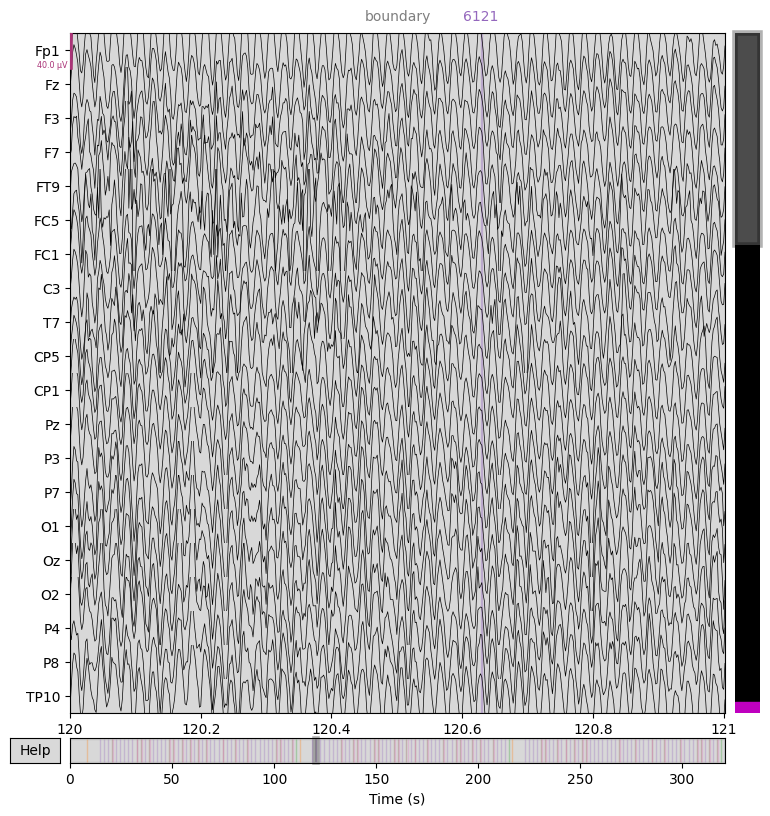

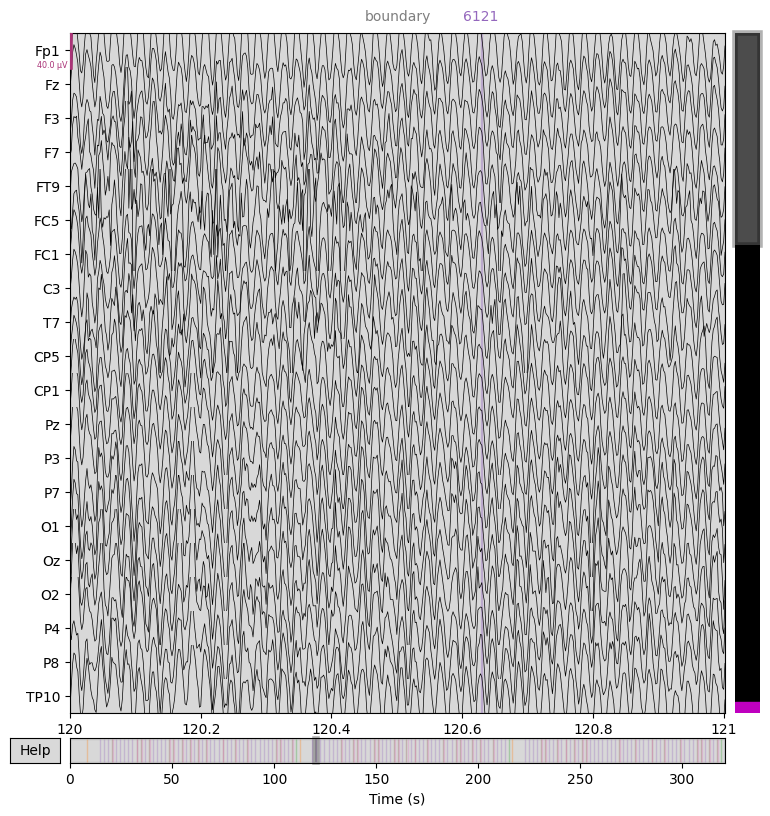

In [11]:
eeg.plot(start=120,duration=1)

In [12]:
display(eeg, type(eeg))

<RawEEGLAB | sb10-s2-1back.fdt, 64 x 160440 (320.9 s), ~78.4 MB, data loaded>

mne.io.eeglab.eeglab.RawEEGLAB

In [13]:
annotations = pd.DataFrame(eeg.annotations)
display(annotations,len(eeg.annotations))

onset  duration description orig_time
0      0.000   320.880    boundary      None
1      8.510     0.002        6111      None
2     14.538     0.002        6121      None
3     16.546     0.002        6121      None
4     18.554     0.002        6121      None
..       ...       ...         ...       ...
195  315.058     0.002        6121      None
196  317.068     0.002        6122      None
197  317.542     0.002        6132      None
198  319.094     0.002        6112      None
199  320.876     0.002         611      None

[200 rows x 4 columns]

200

In [14]:
events, events_dict = mne.events_from_annotations(eeg)

Used Annotations descriptions: ['611', '6111', '6112', '6121', '6122', '6132', 'boundary']


In [15]:
display(len(events), events_dict, events, events.shape)

200

{'611': 1,
 '6111': 2,
 '6112': 3,
 '6121': 4,
 '6122': 5,
 '6132': 6,
 'boundary': 7}

array([[     0,      0,      7],
       [  4255,      0,      2],
       [  7269,      0,      4],
       [  8273,      0,      4],
       [  9277,      0,      4],
       [ 10281,      0,      5],
       [ 10516,      0,      6],
       [ 11285,      0,      4],
       [ 12290,      0,      4],
       [ 13293,      0,      4],
       [ 14298,      0,      4],
       [ 15302,      0,      4],
       [ 16306,      0,      5],
       [ 16532,      0,      6],
       [ 17310,      0,      5],
       [ 17572,      0,      6],
       [ 18314,      0,      4],
       [ 19319,      0,      5],
       [ 19532,      0,      6],
       [ 20322,      0,      4],
       [ 21327,      0,      4],
       [ 22331,      0,      4],
       [ 23335,      0,      4],
       [ 24339,      0,      5],
       [ 24564,      0,      6],
       [ 25343,      0,      5],
       [ 25573,      0,      6],
       [ 26348,      0,      4],
       [ 27352,      0,      5],
       [ 27588,      0,      6],
       [ 2

(200, 3)

In [16]:
display(eeg.info, eeg.n_times, eeg.times)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ECG1, CP5, CP1, Pz, P3, ...
 chs: 63 EEG, 1 ECG
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 500.0 Hz
>

160440

array([0.00000e+00, 2.00000e-03, 4.00000e-03, ..., 3.20874e+02,
       3.20876e+02, 3.20878e+02])

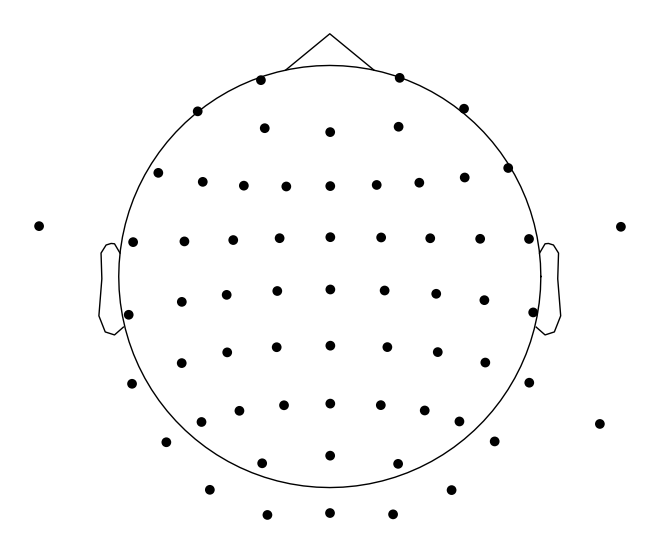

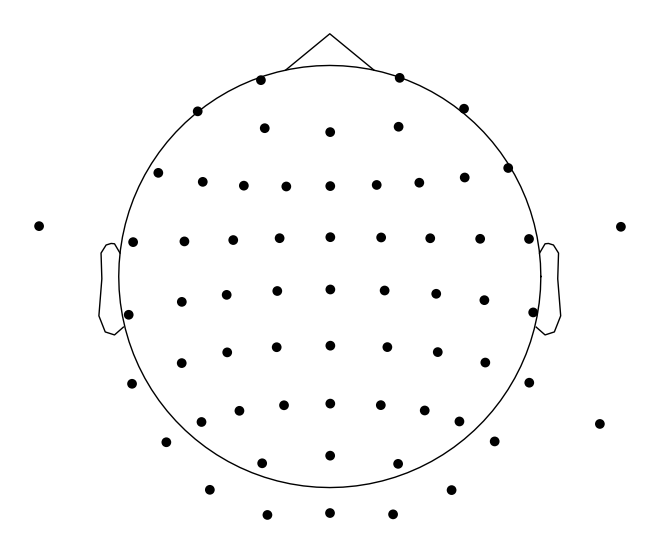

In [17]:
eeg.plot_sensors()

#### Extracting eeg information

In [18]:
data, times = eeg[:]
channels = eeg.ch_names

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
data_norm = scaler.fit_transform(data.T)
data_norm = data_norm.T

In [21]:
display(data_norm.shape)

(64, 160440)

#### Plotting channels

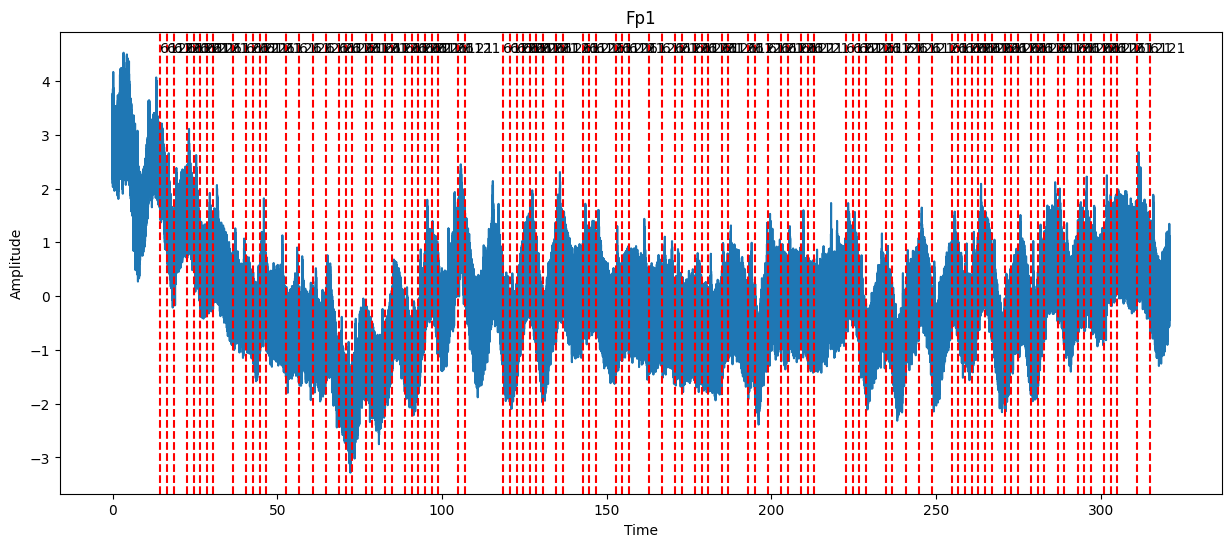

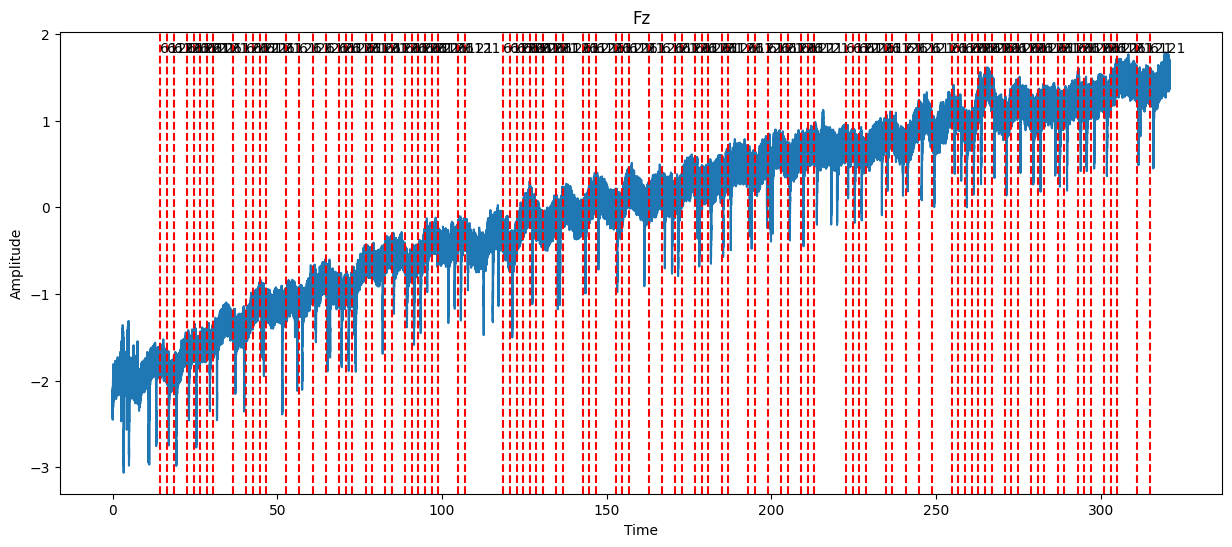

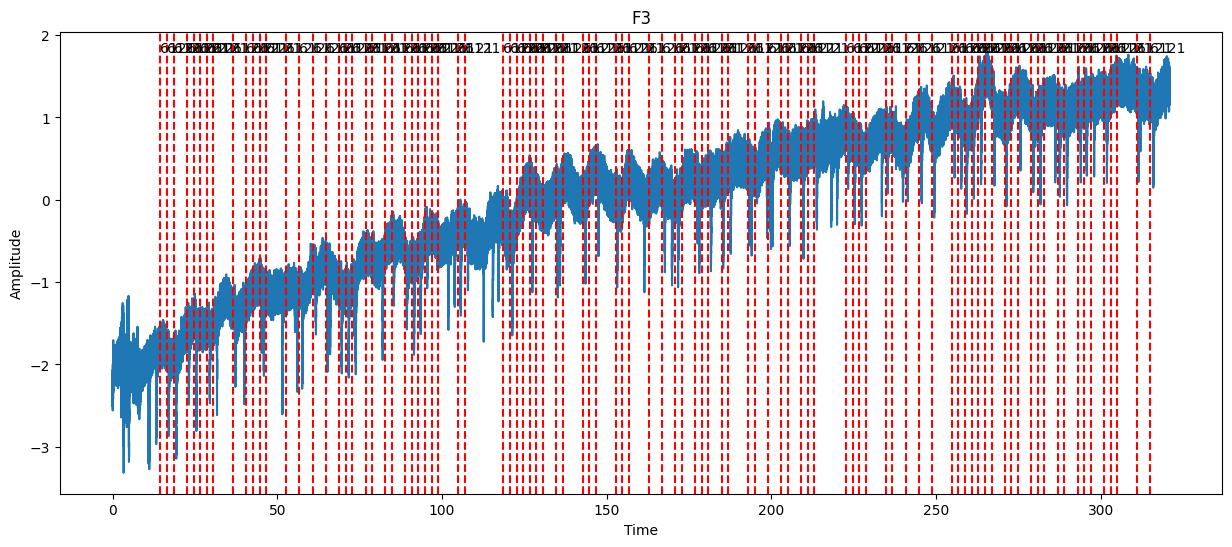

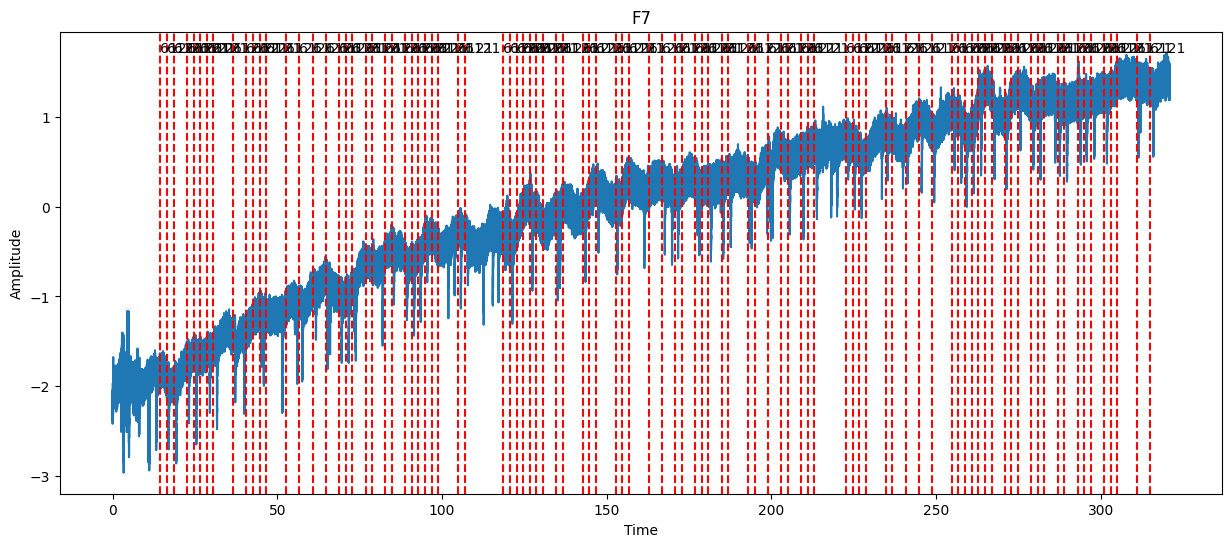

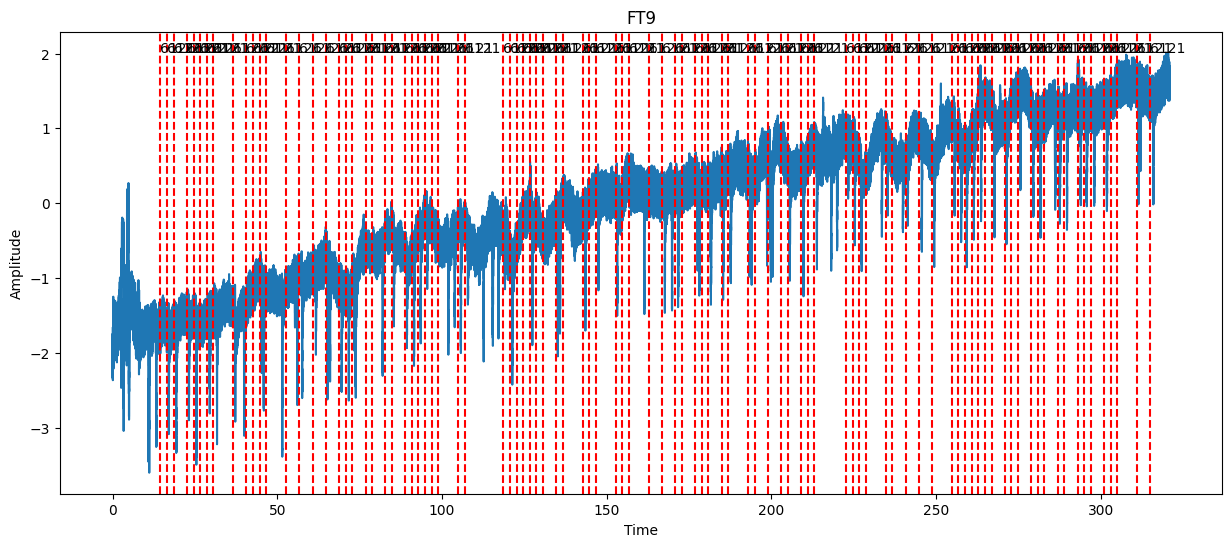

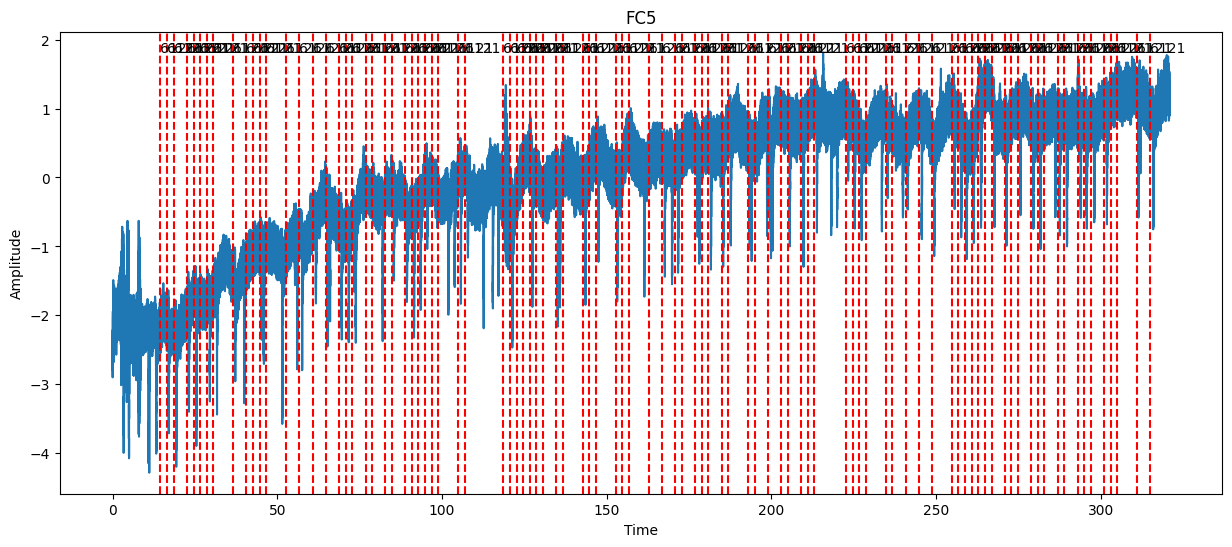

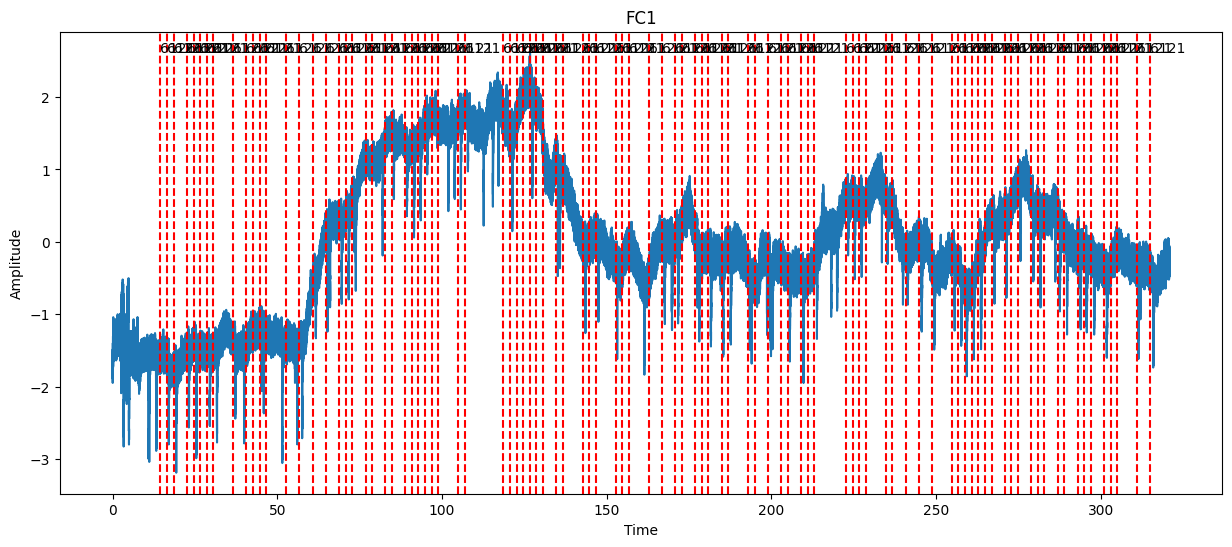

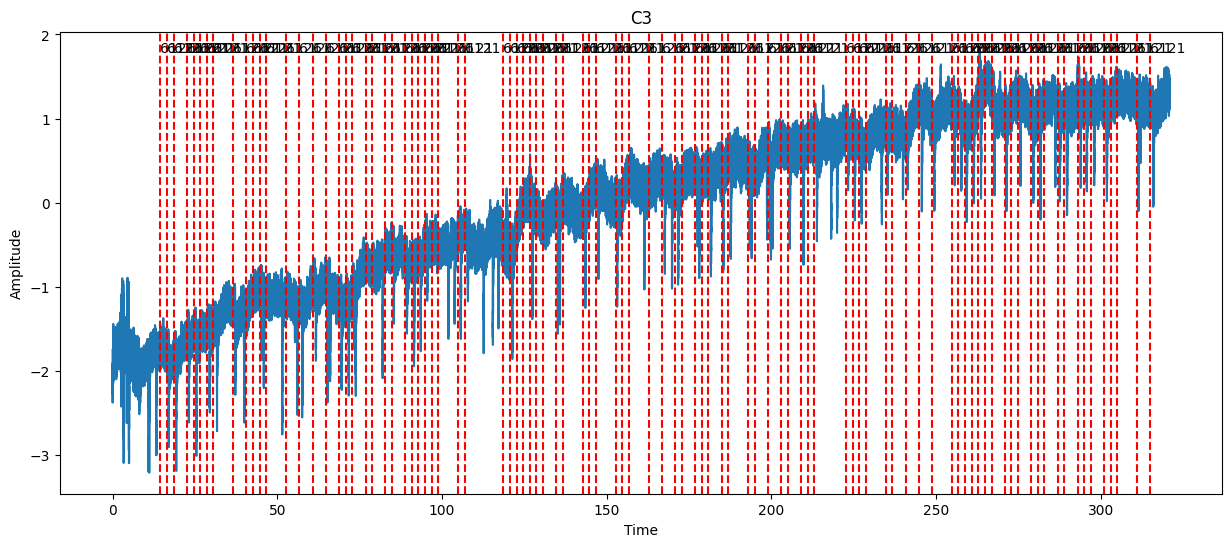

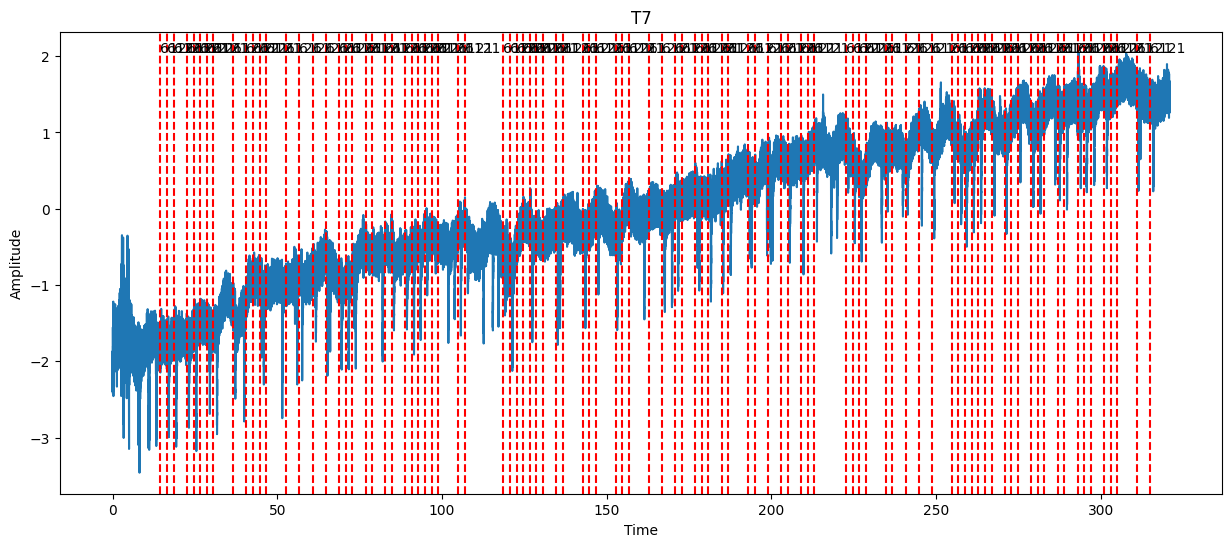

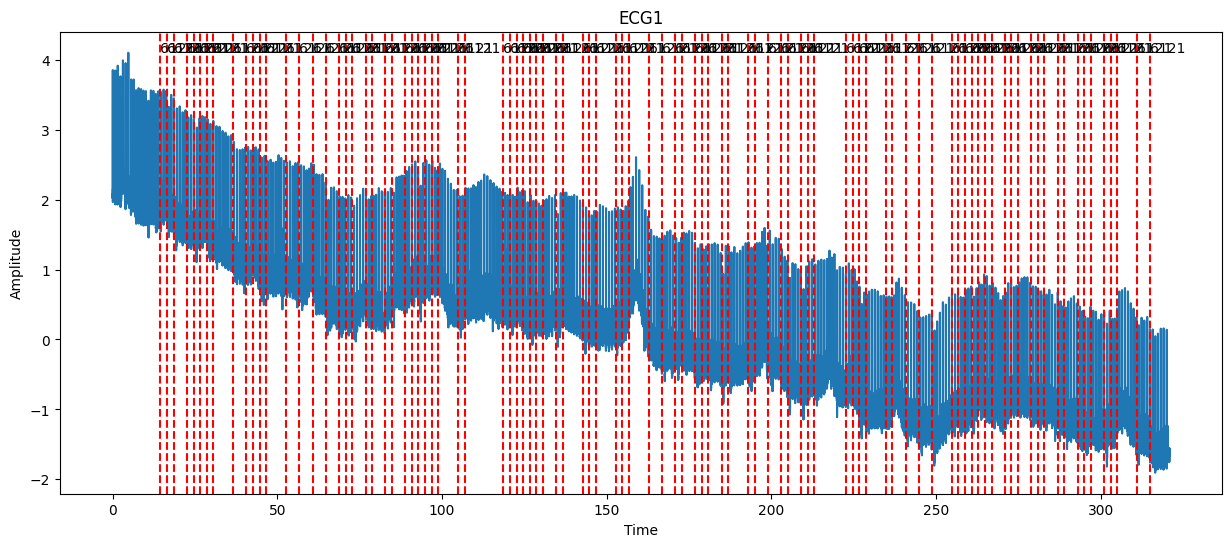

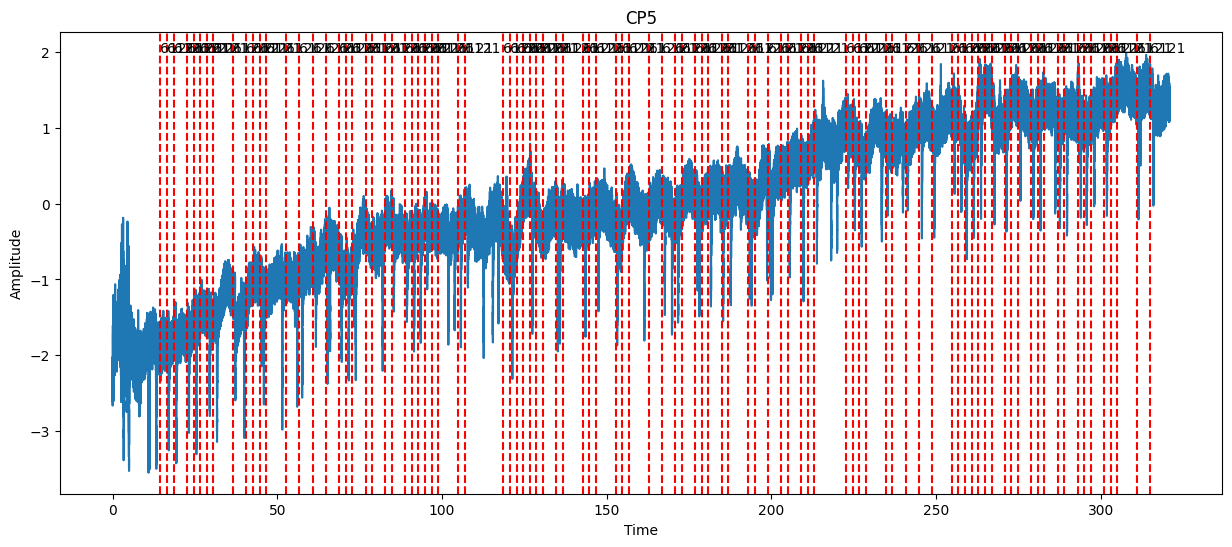

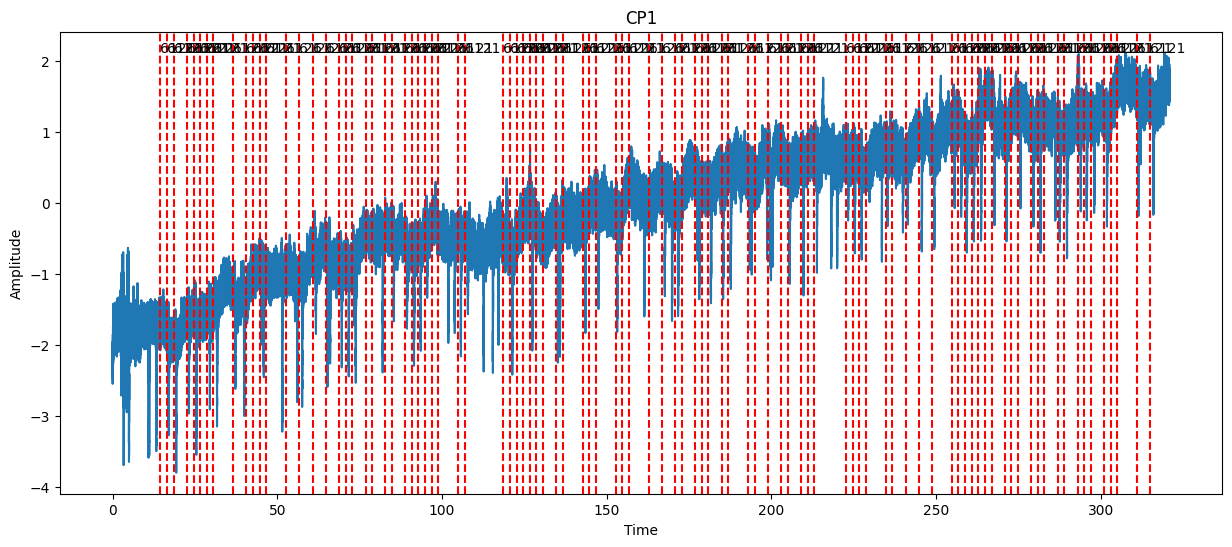

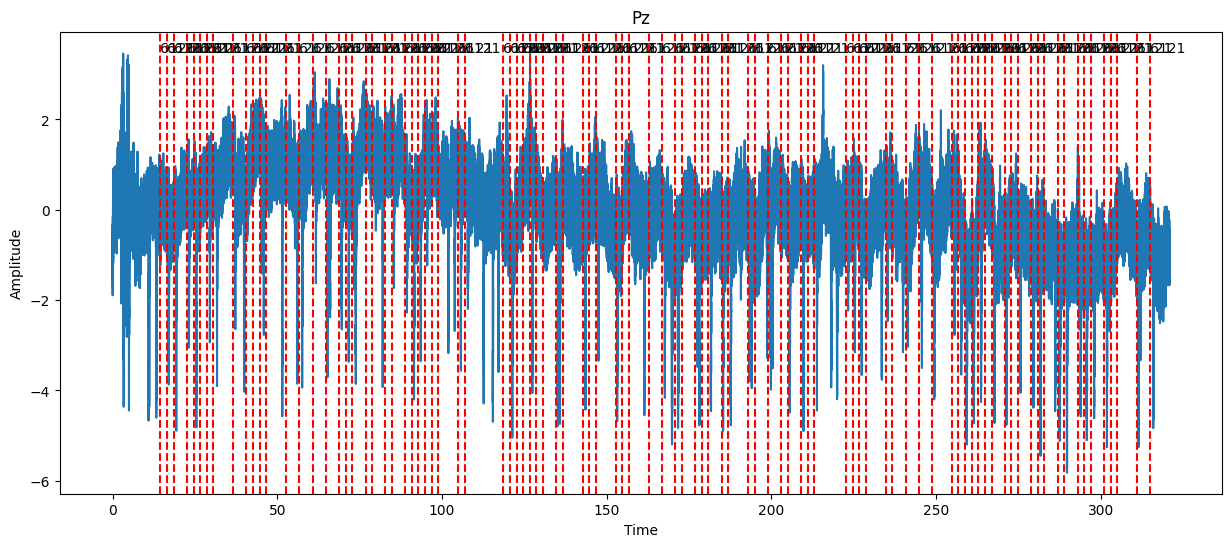

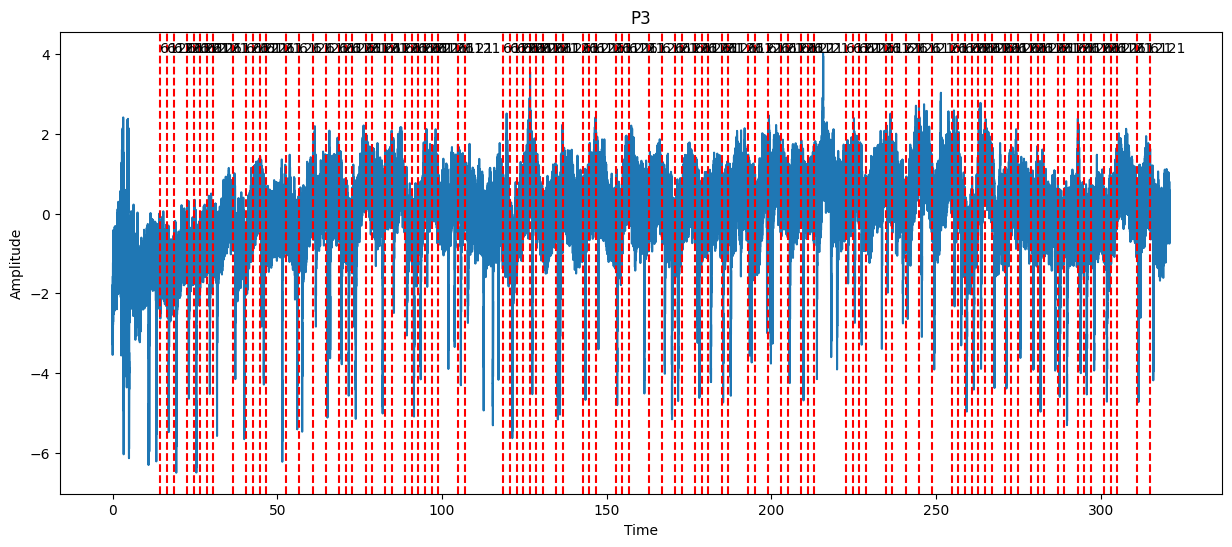

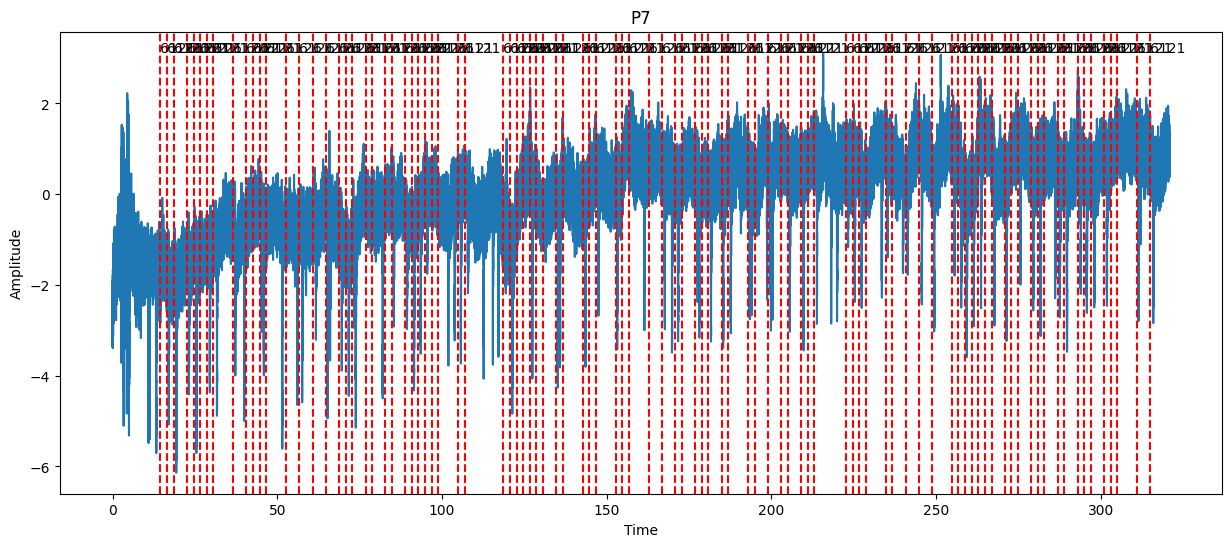

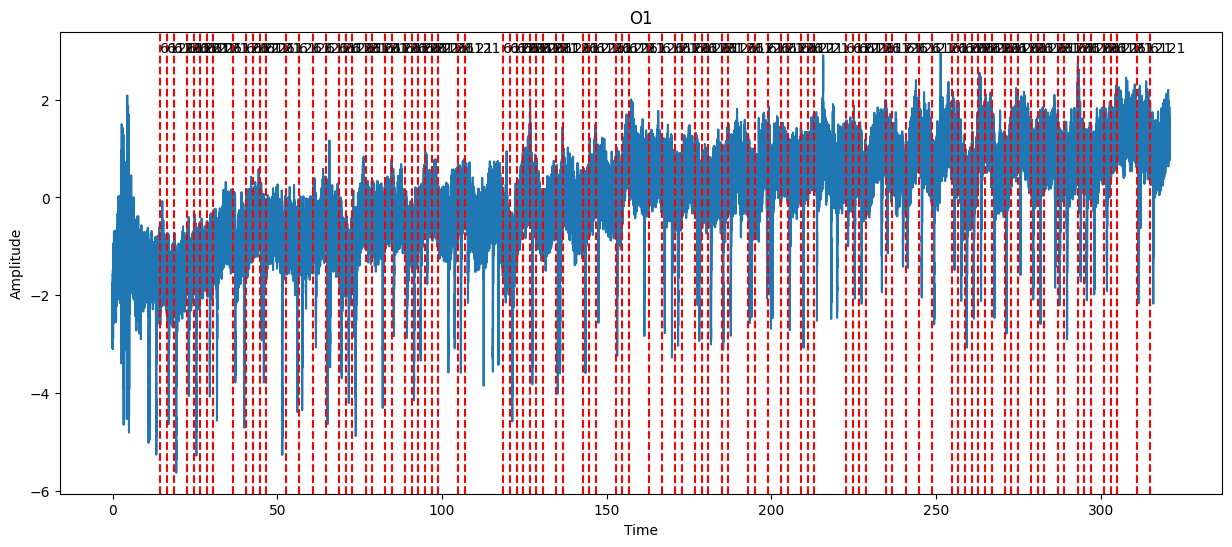

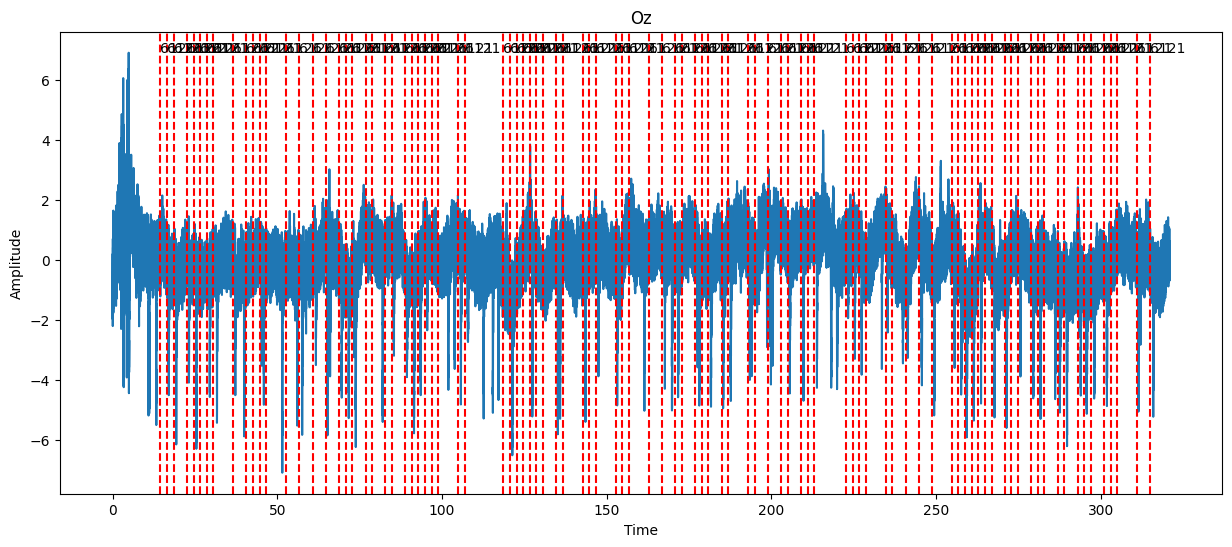

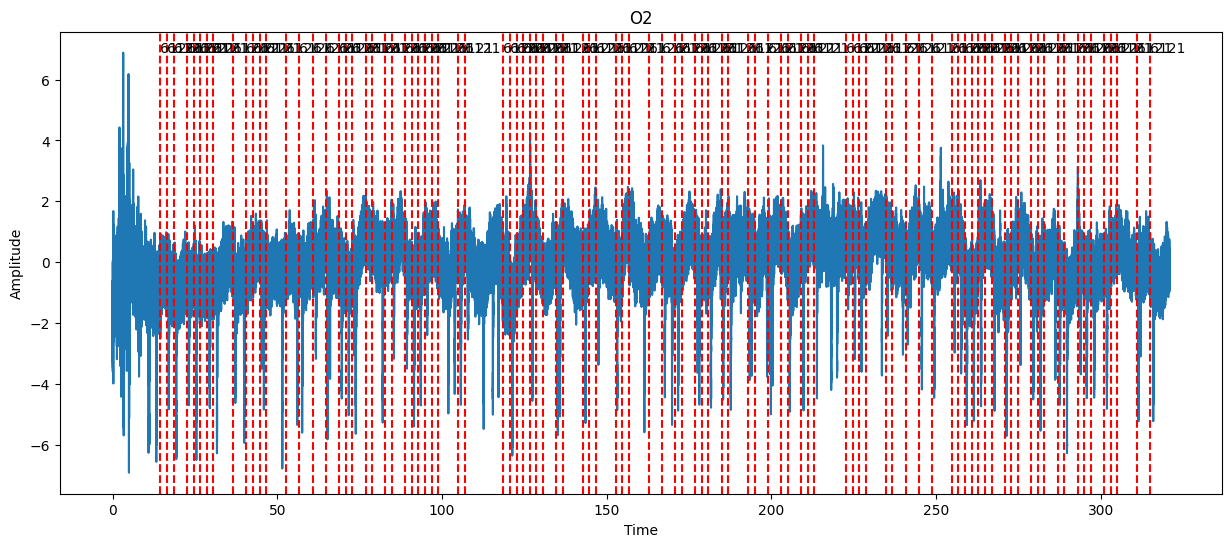

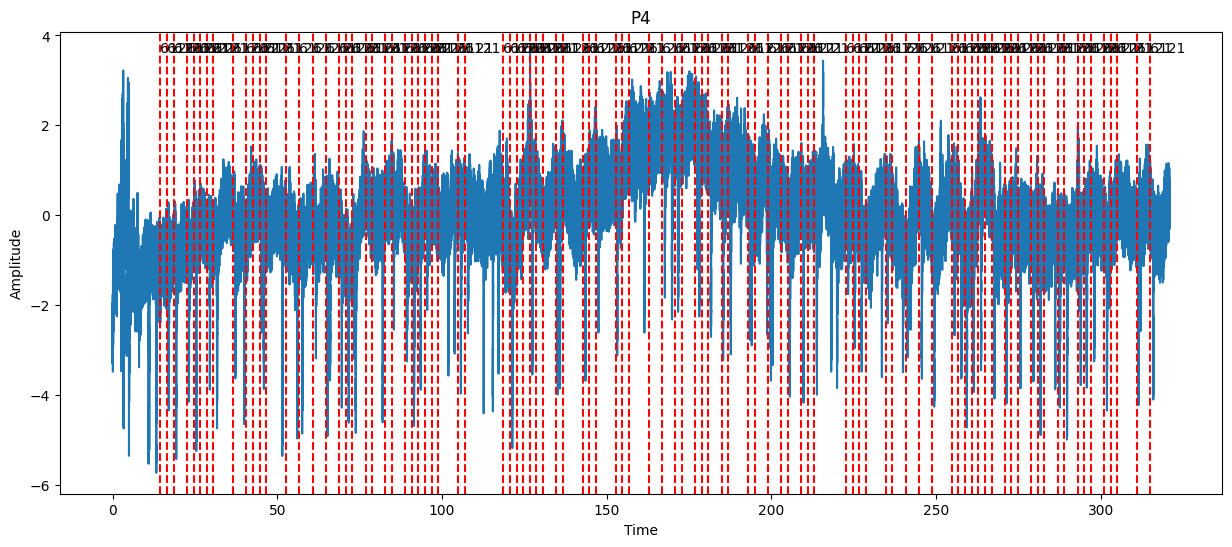

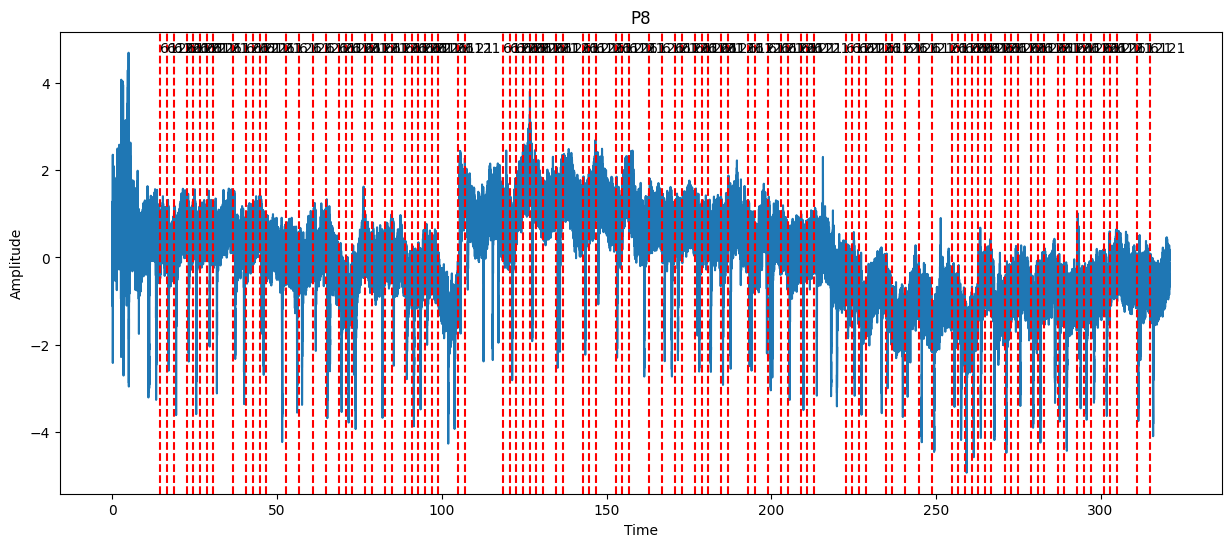

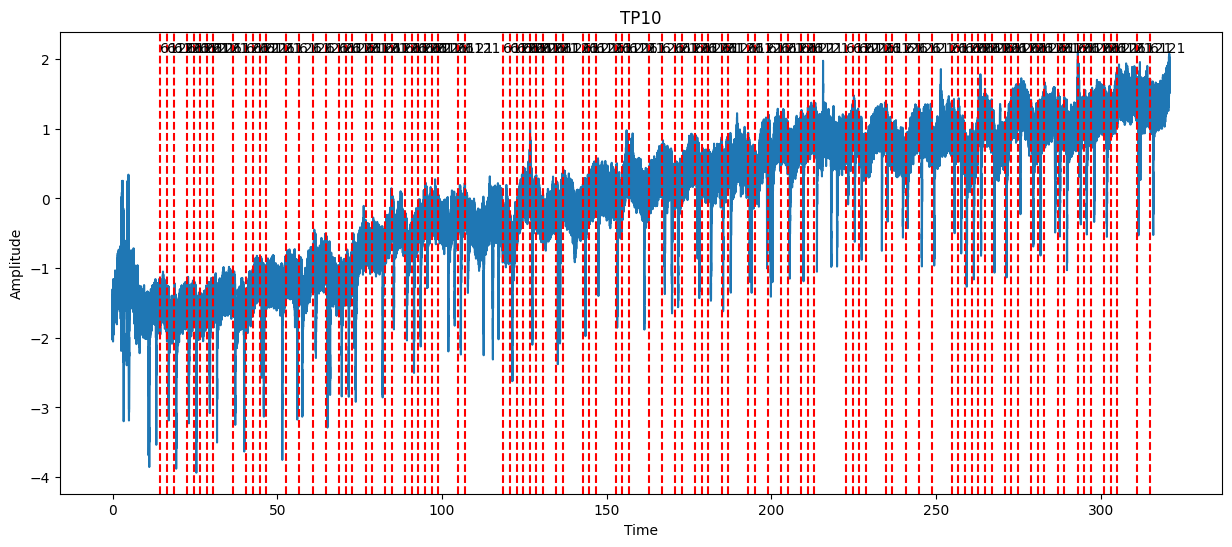

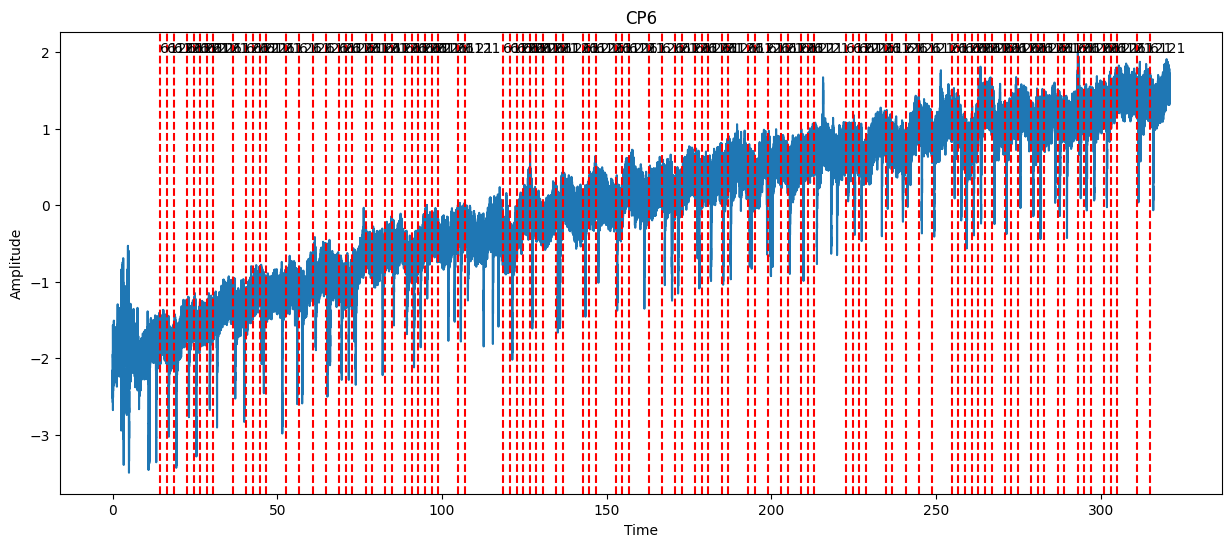

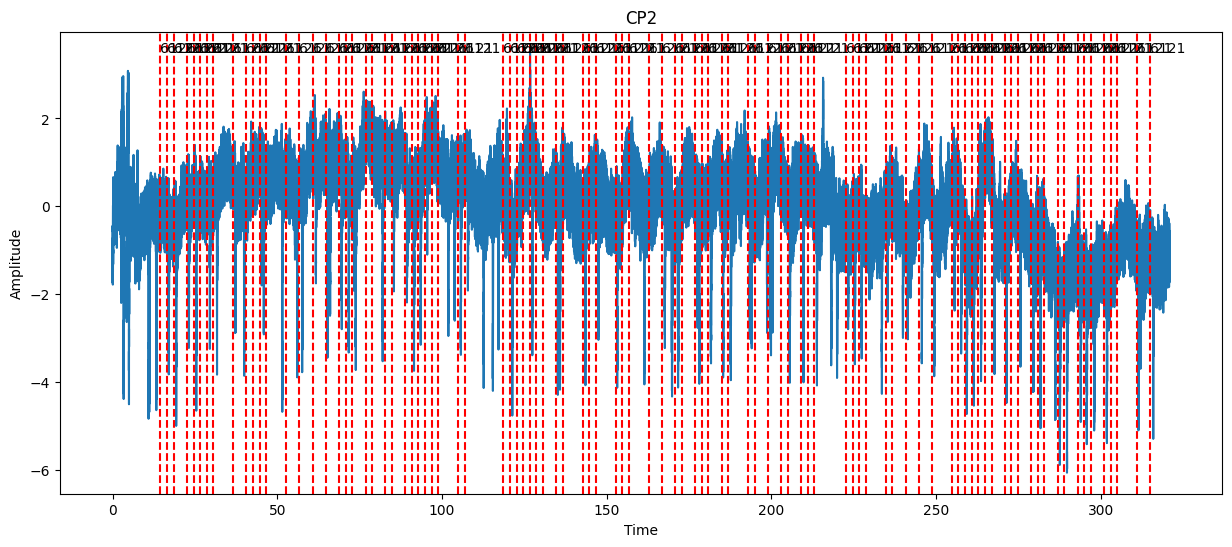

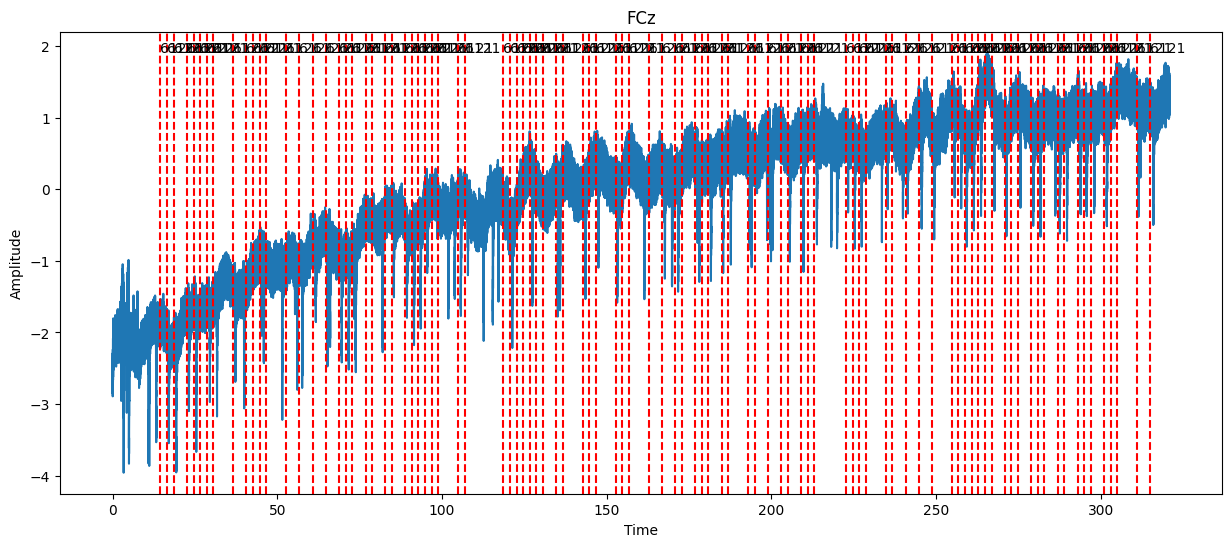

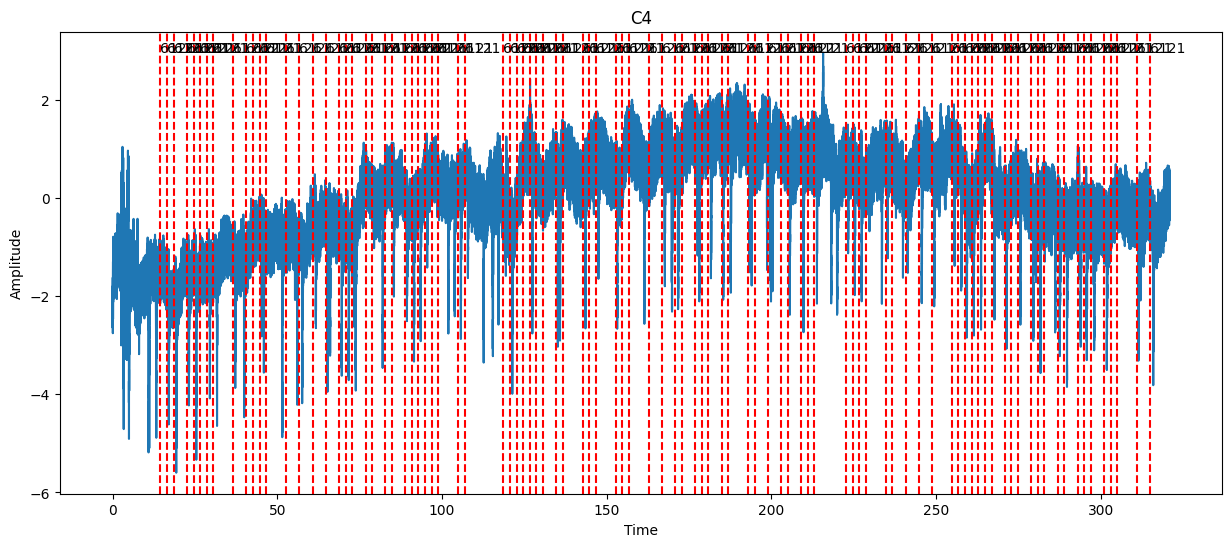

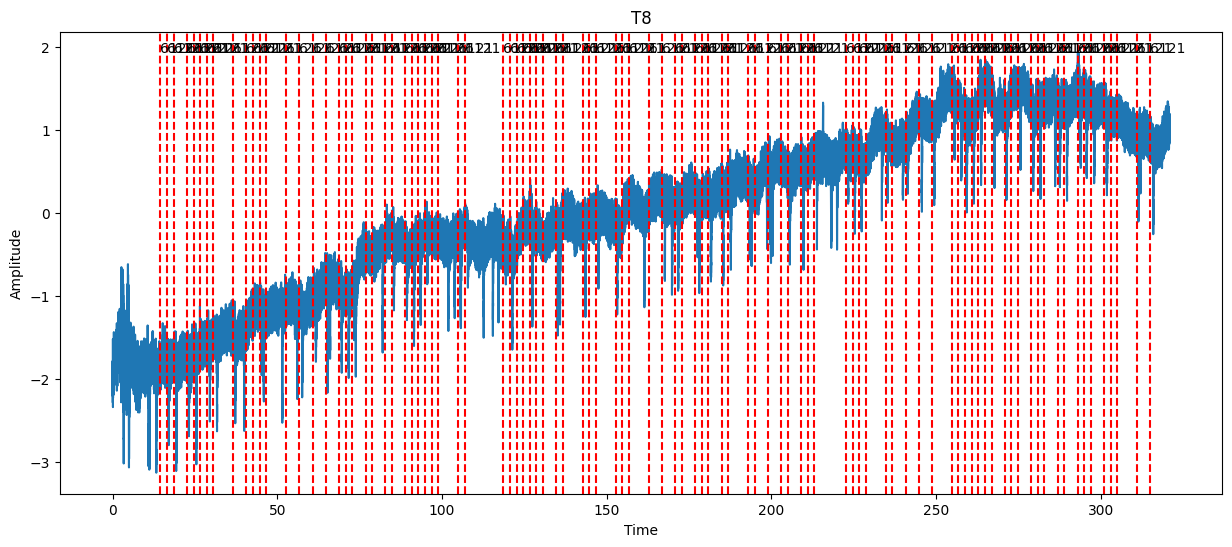

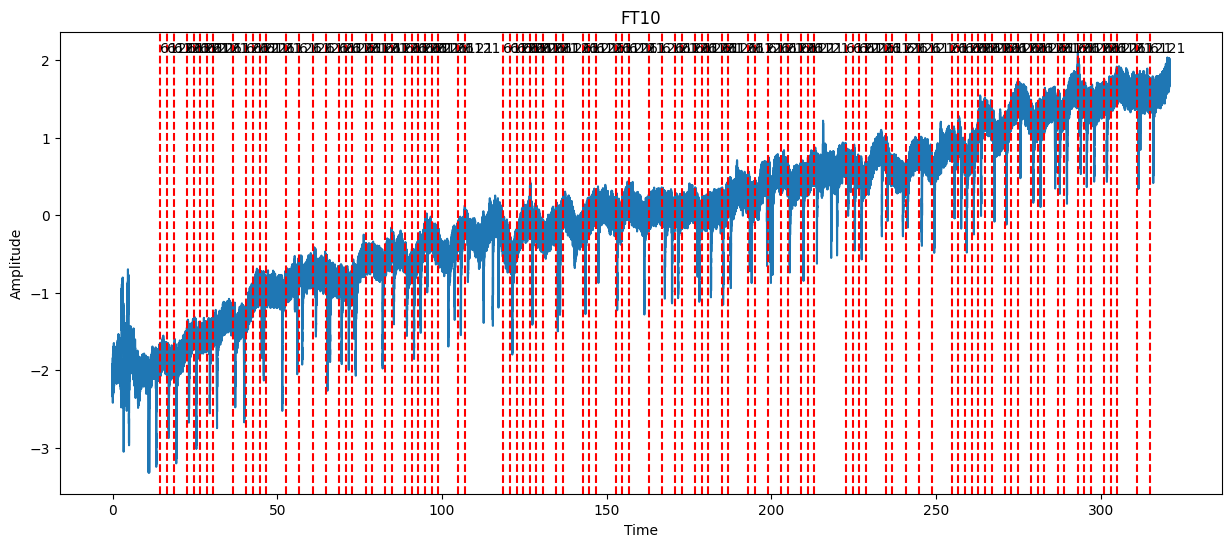

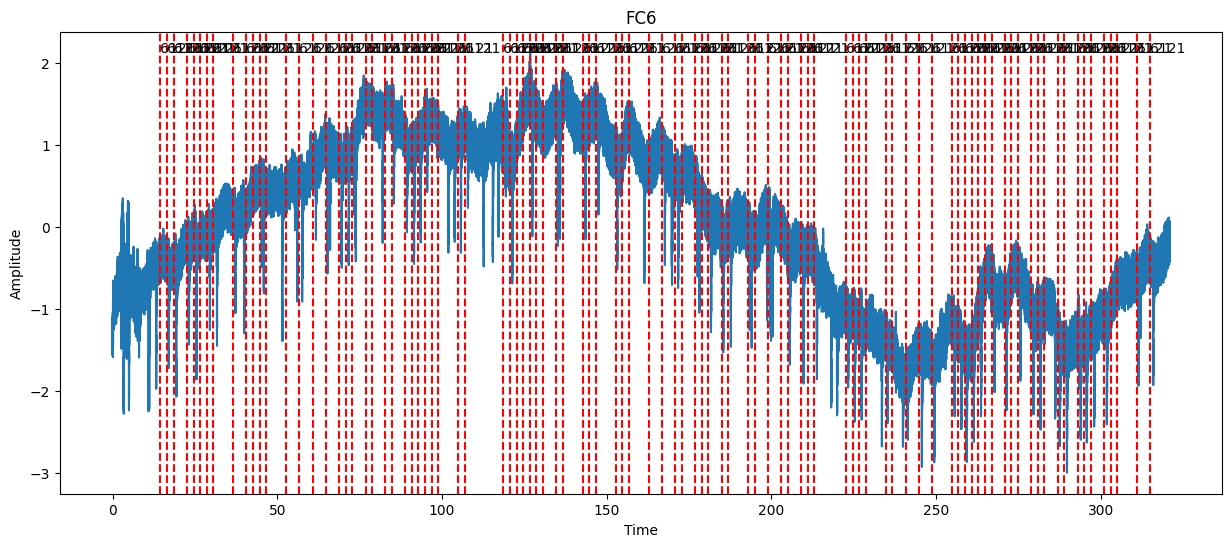

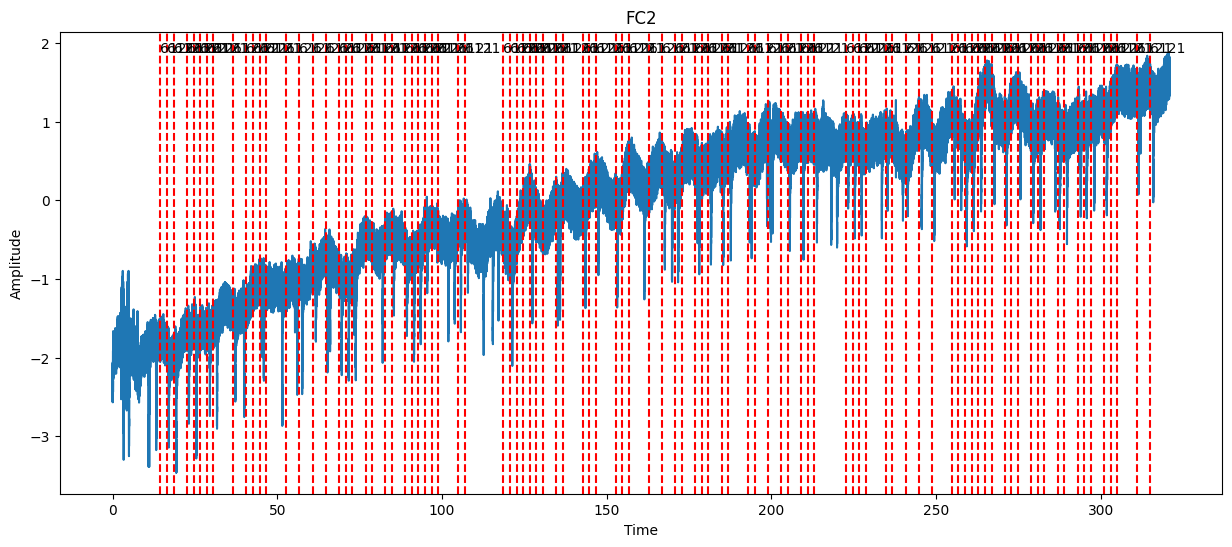

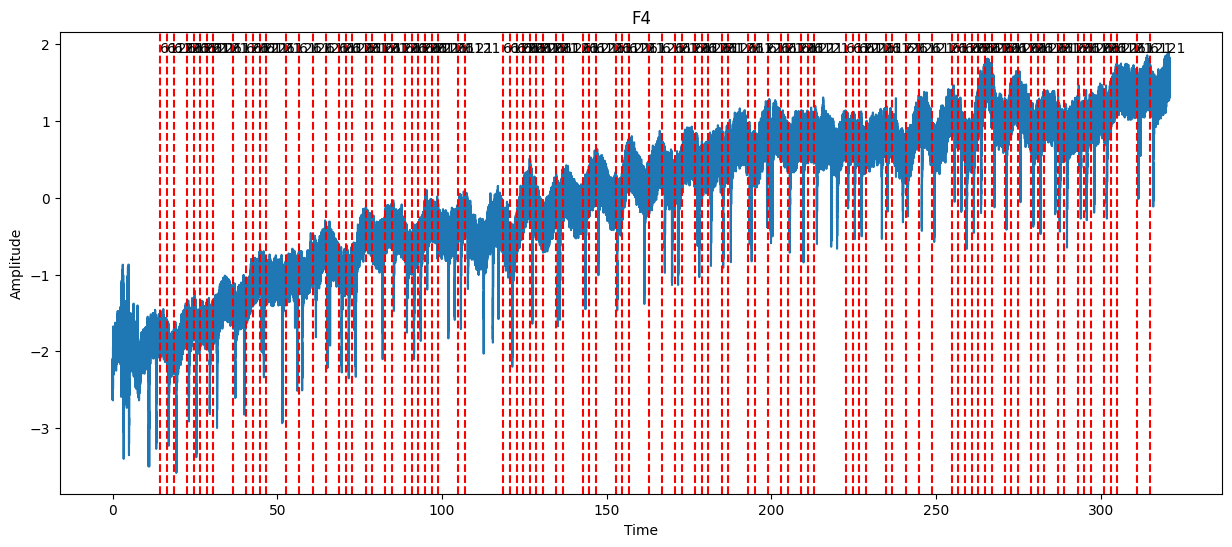

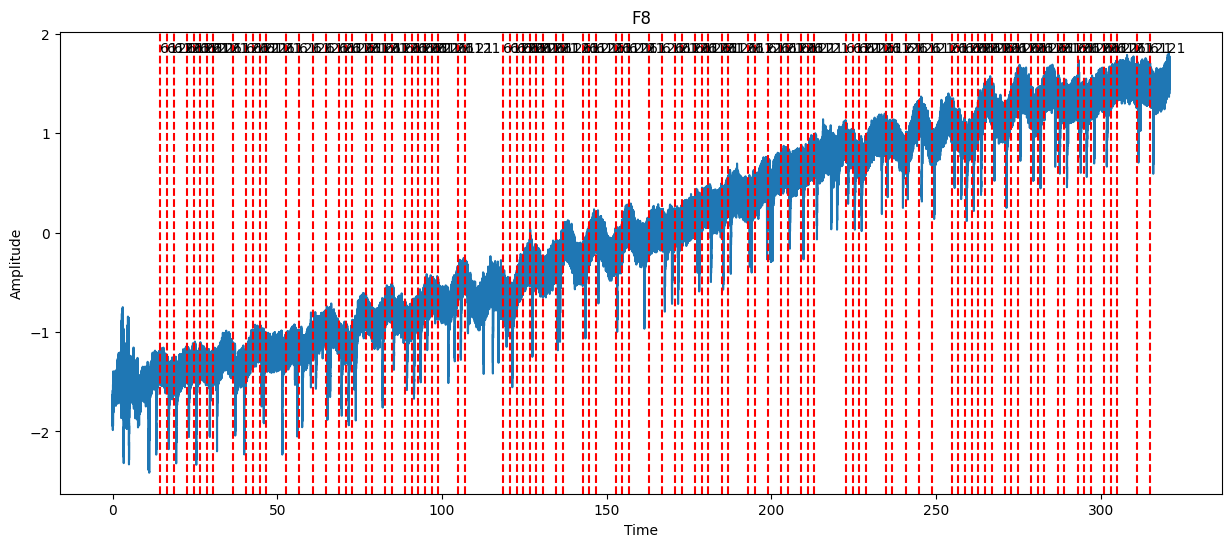

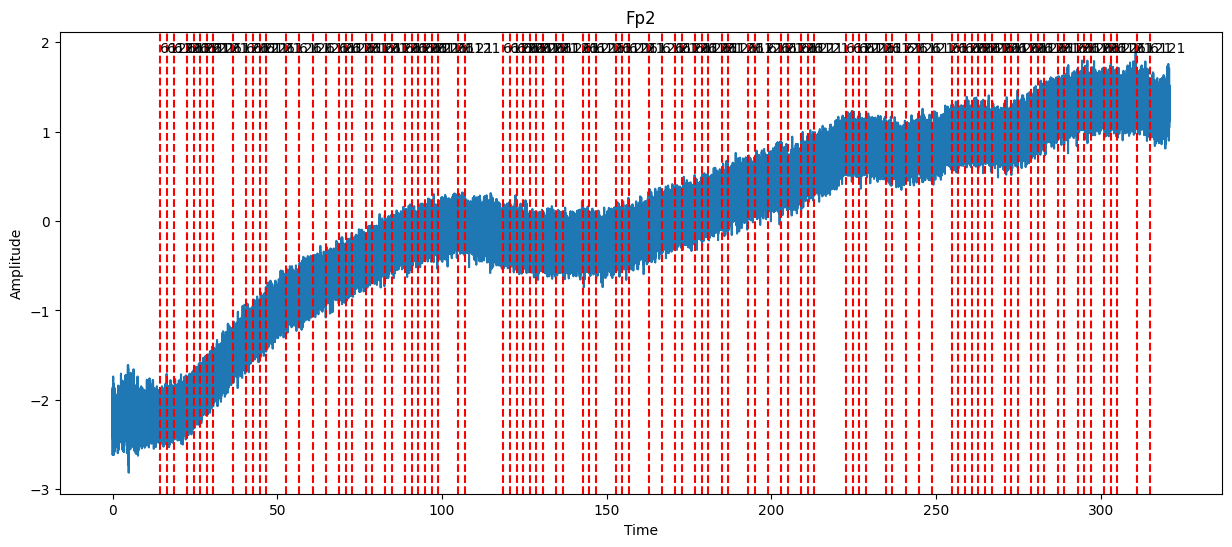

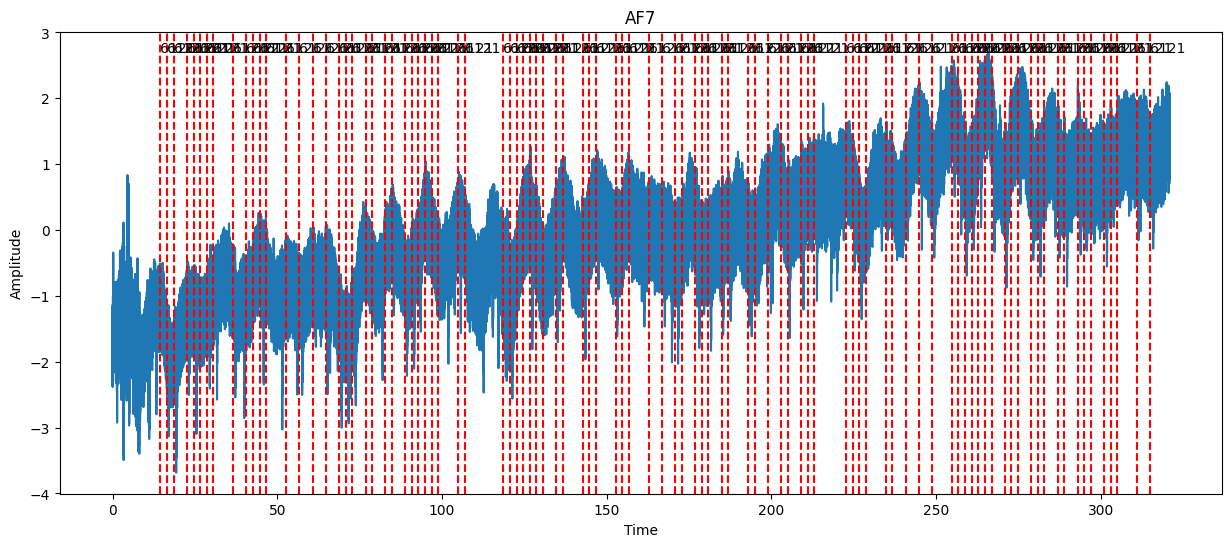

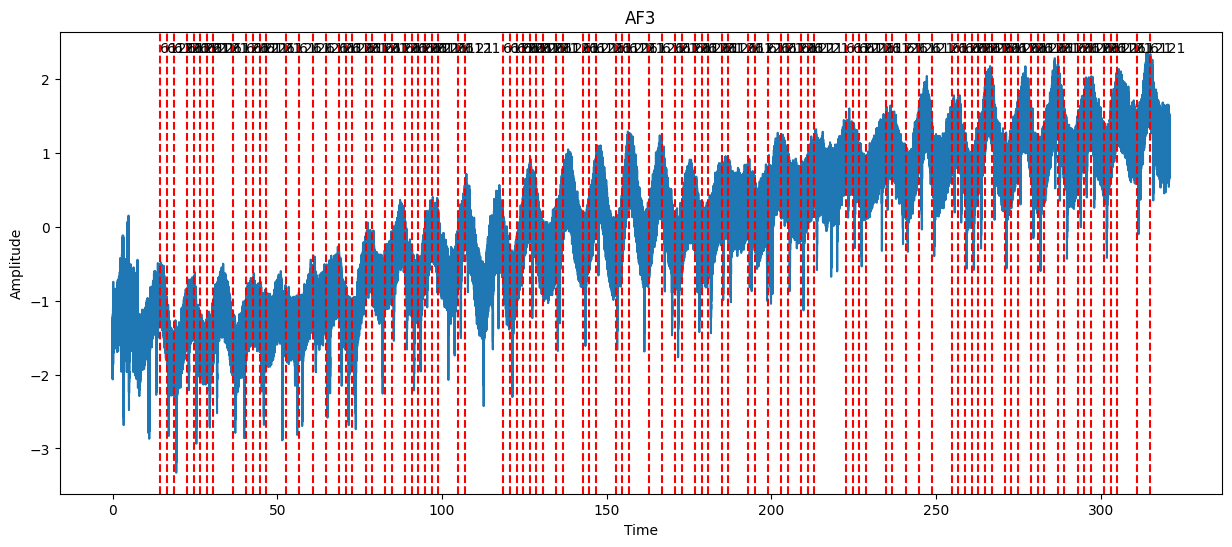

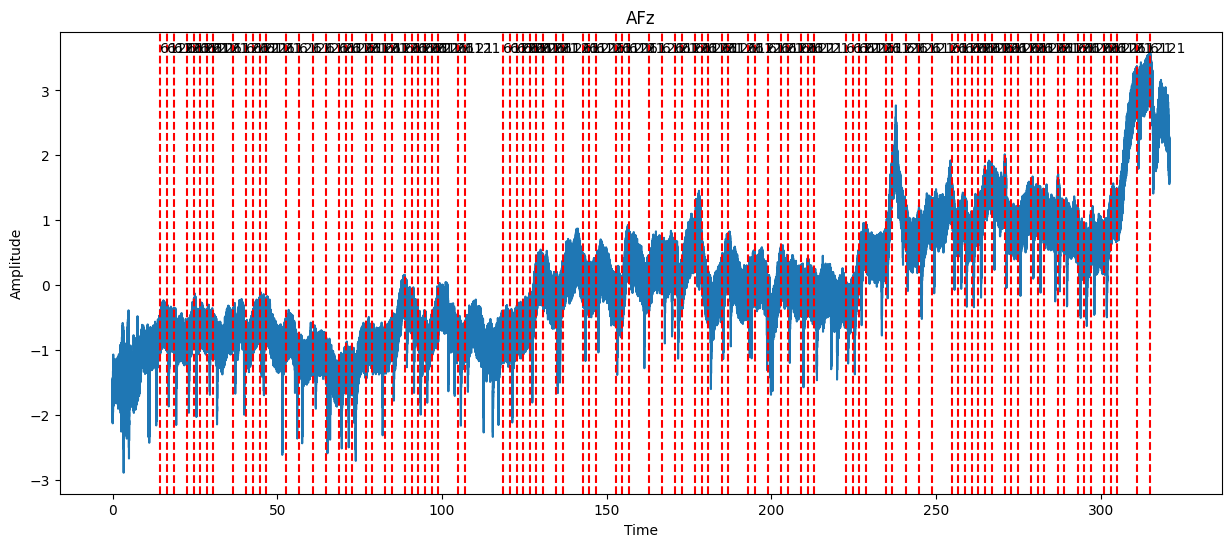

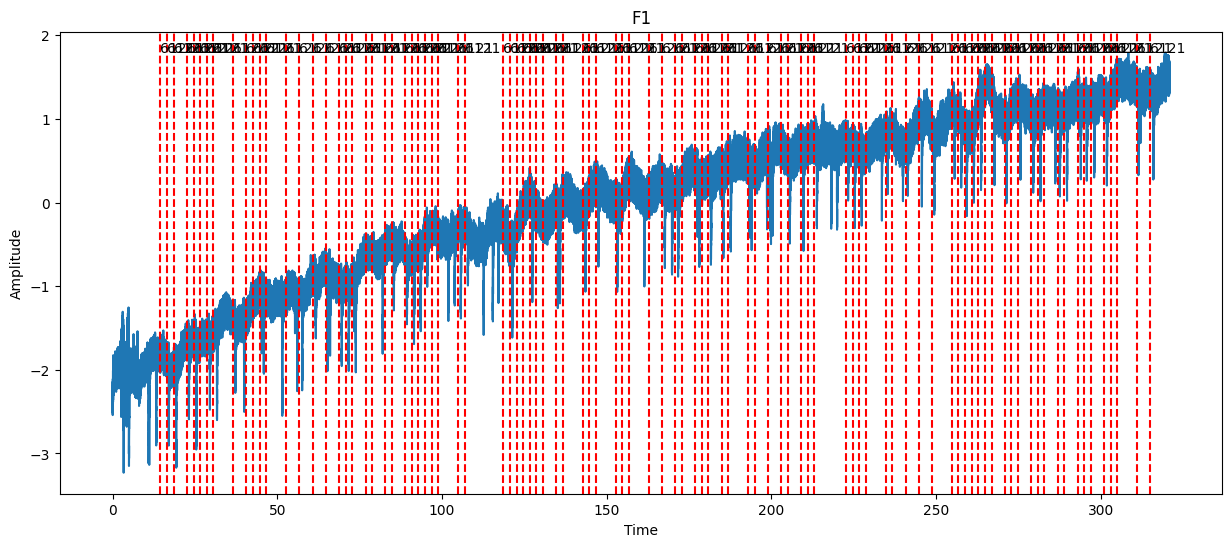

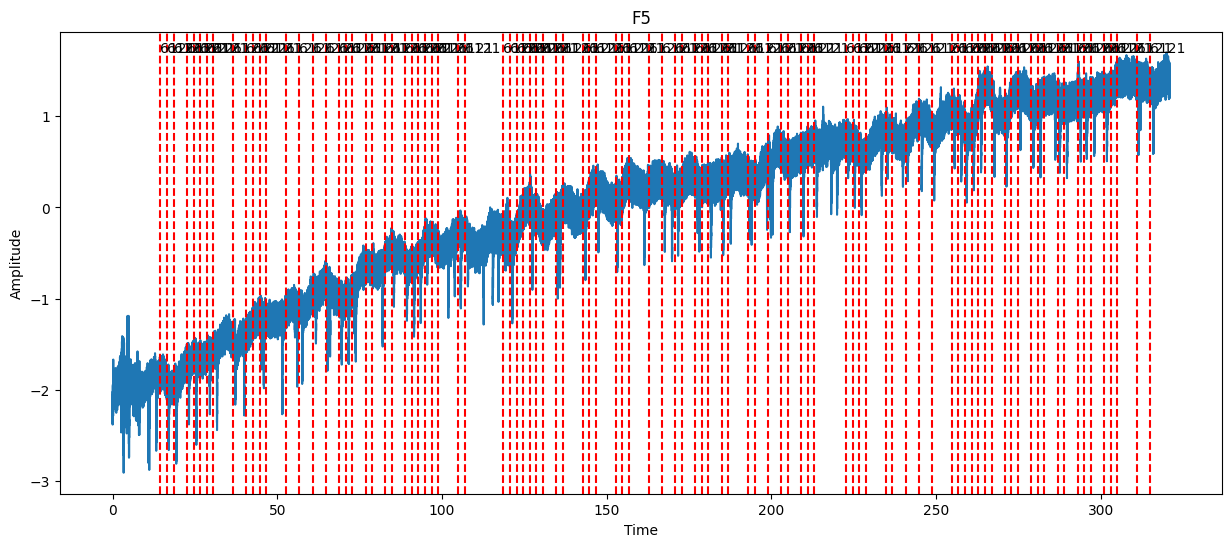

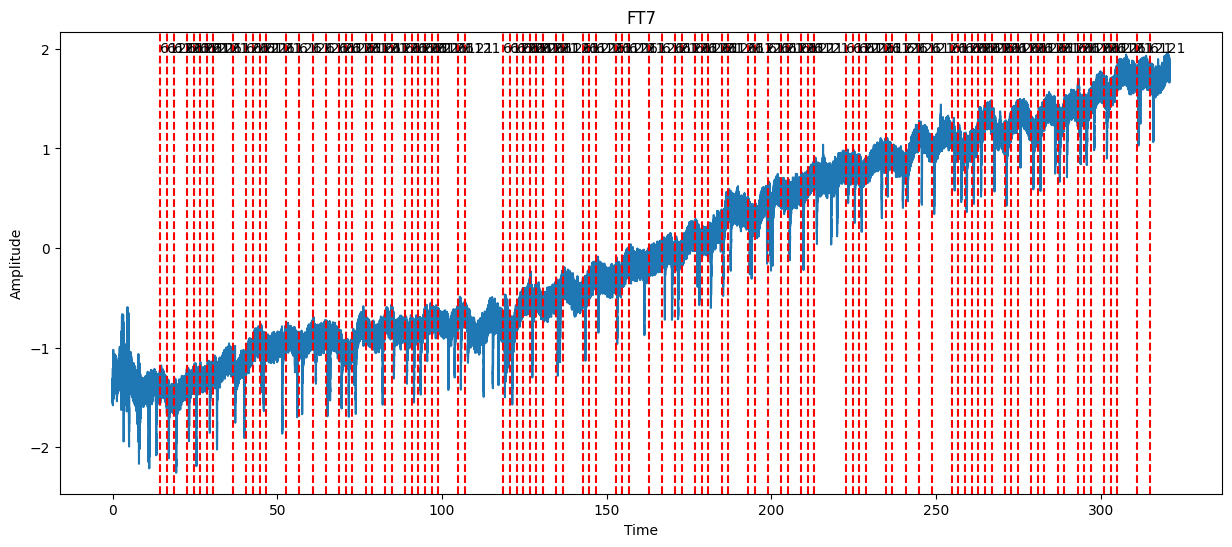

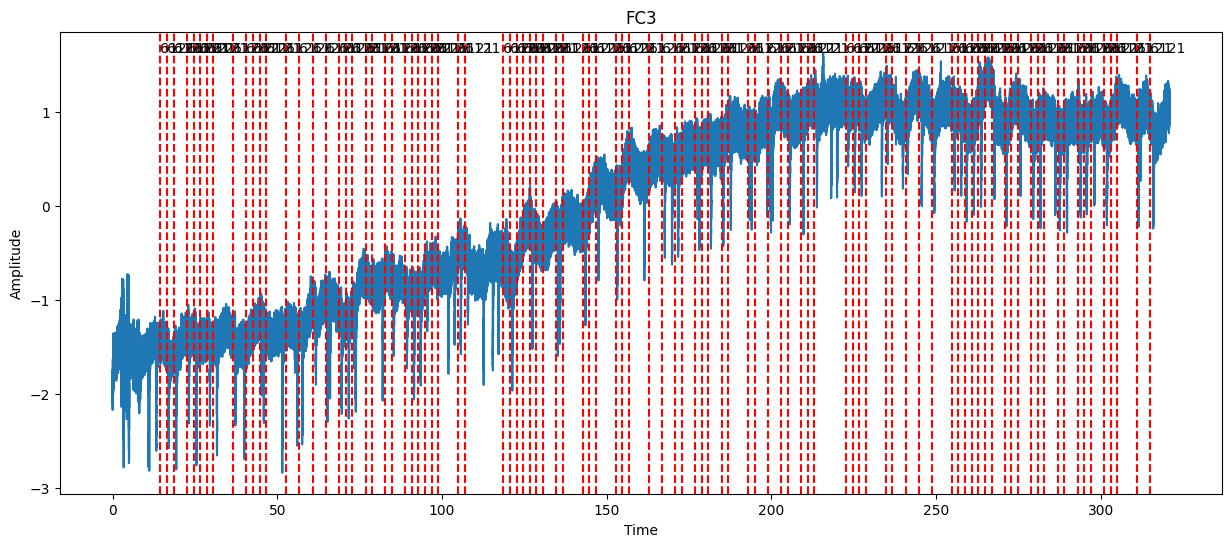

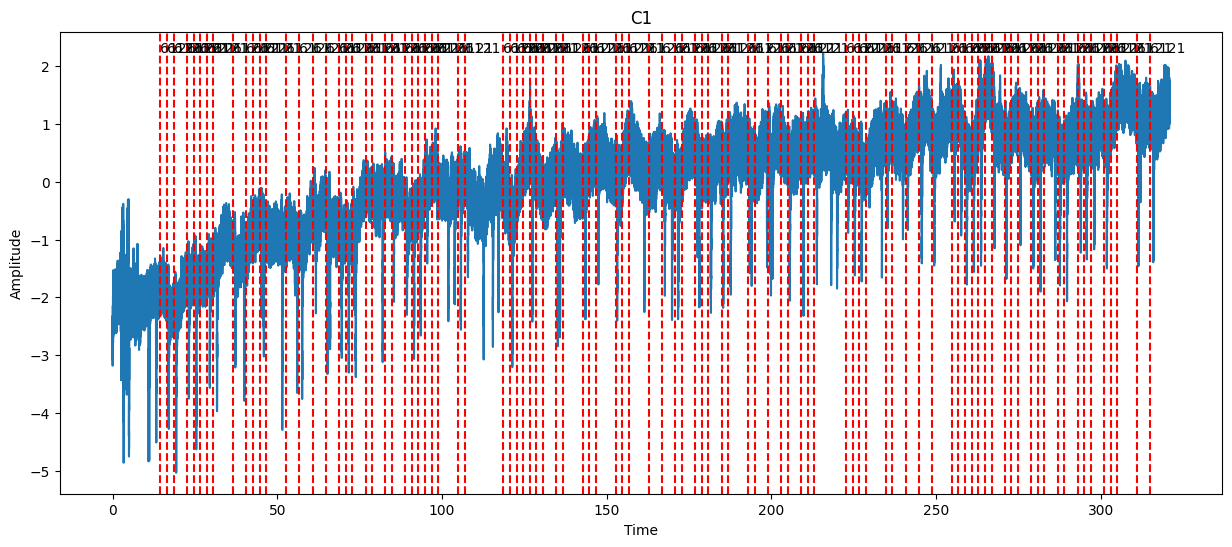

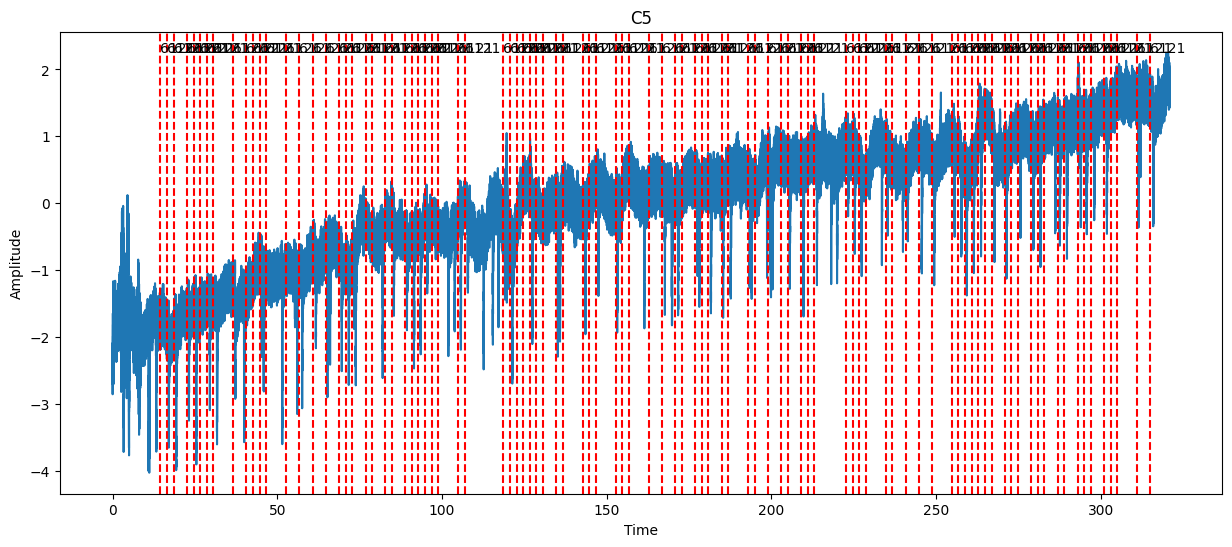

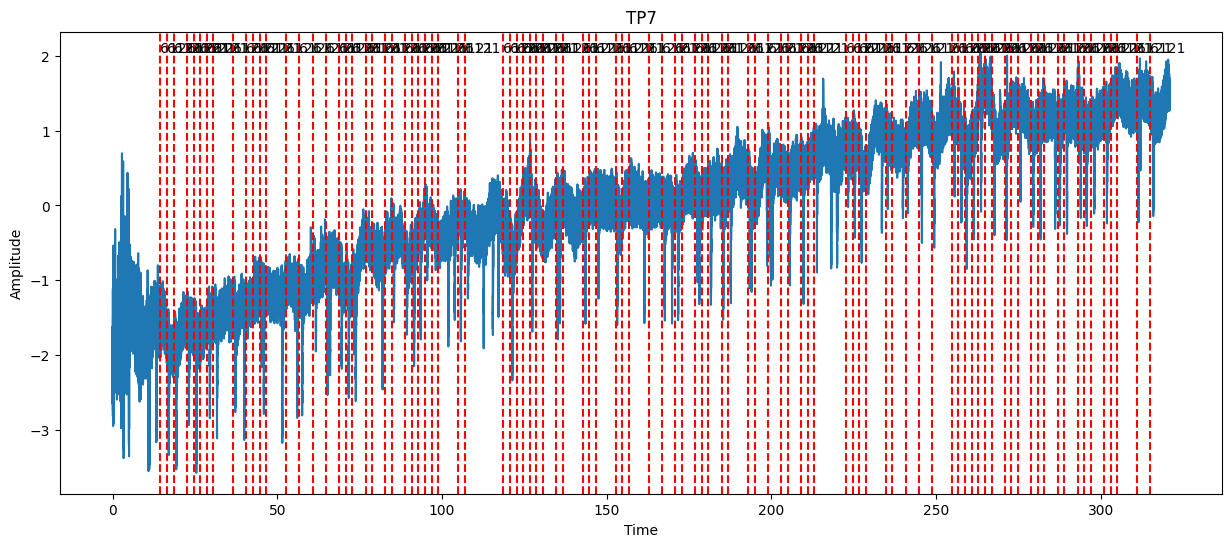

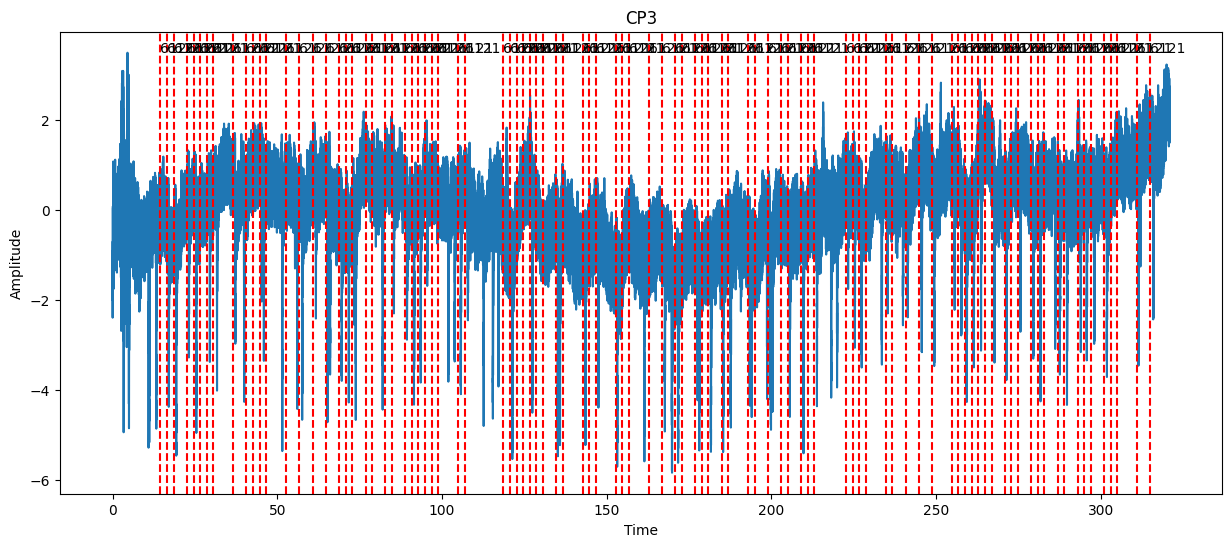

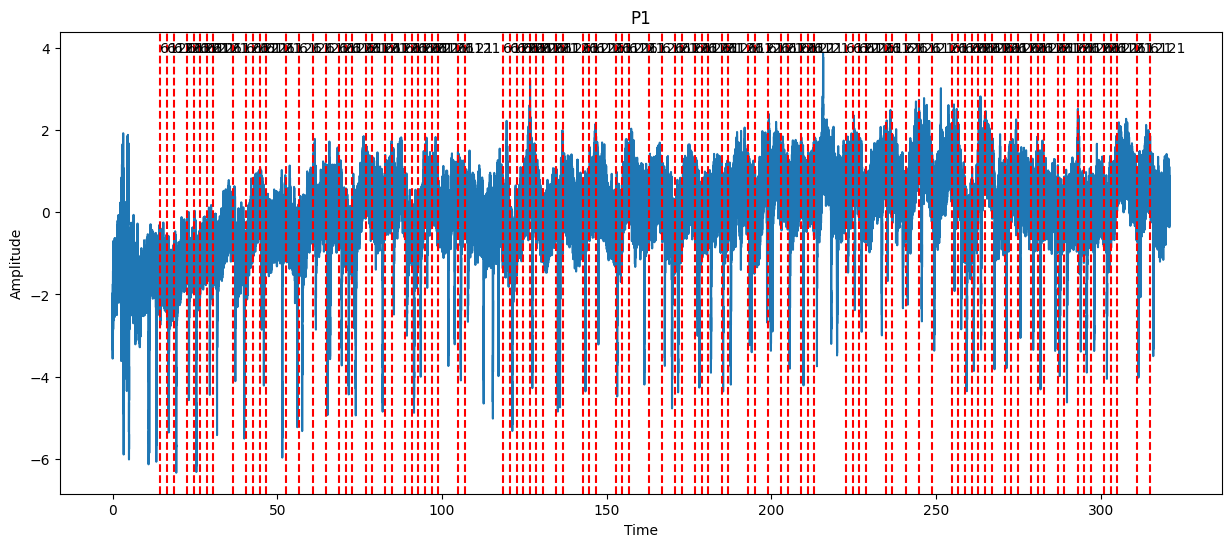

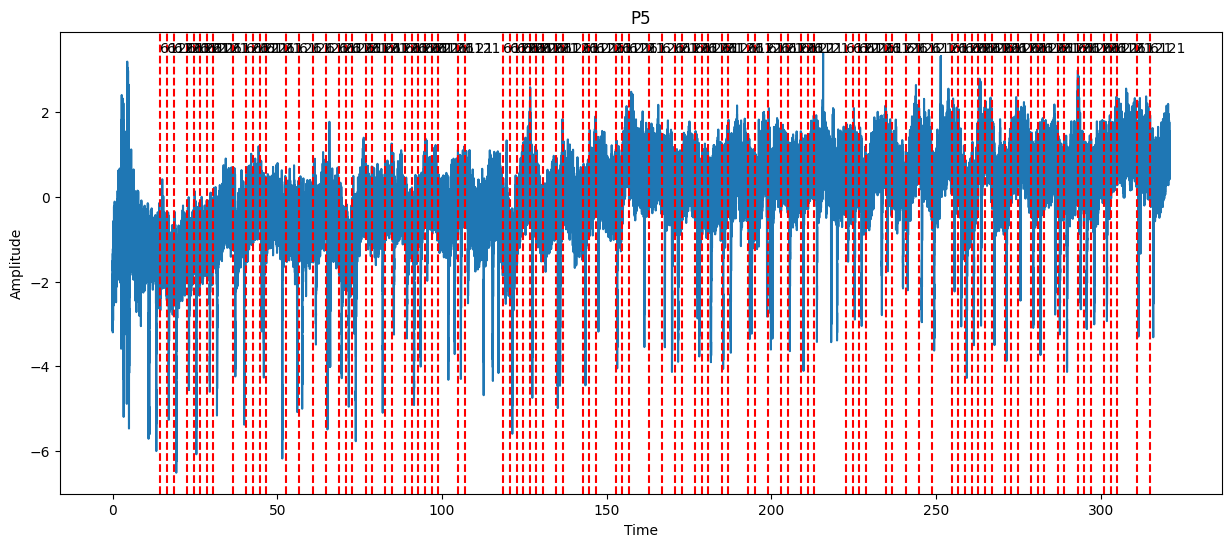

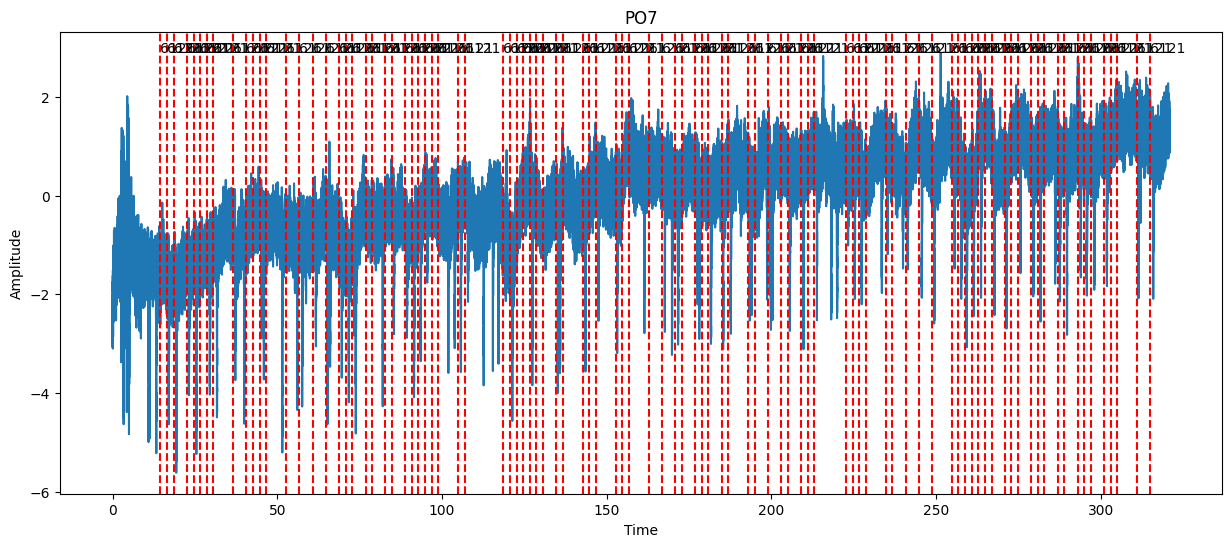

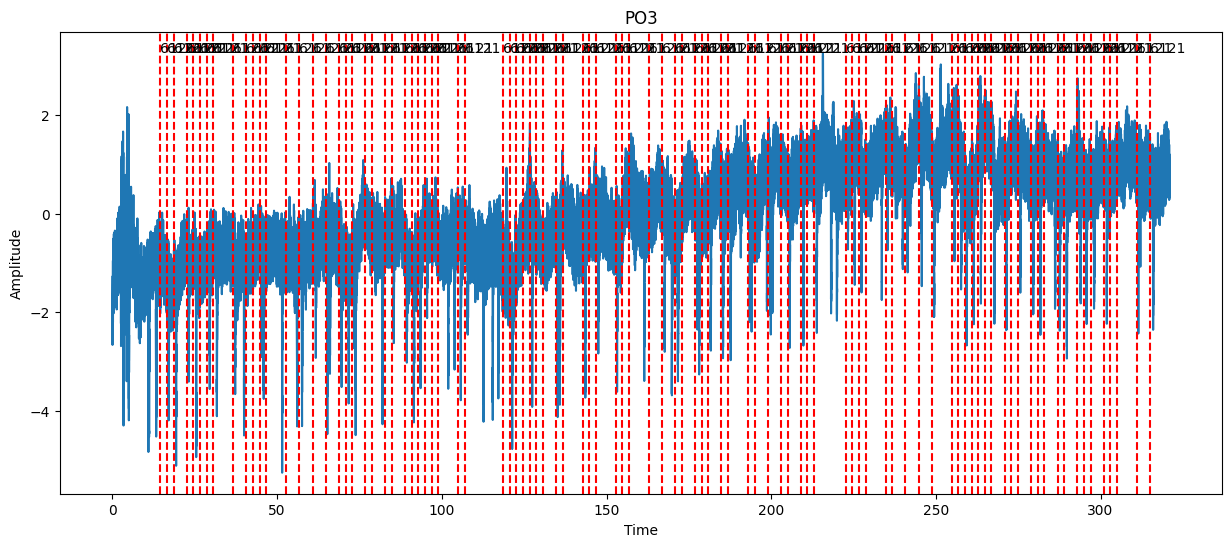

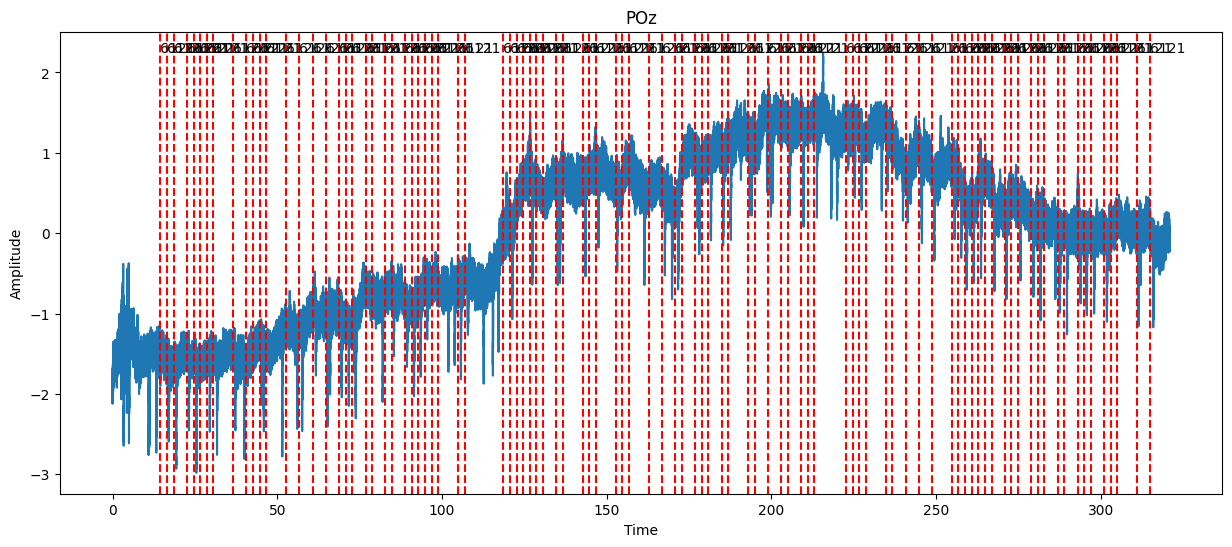

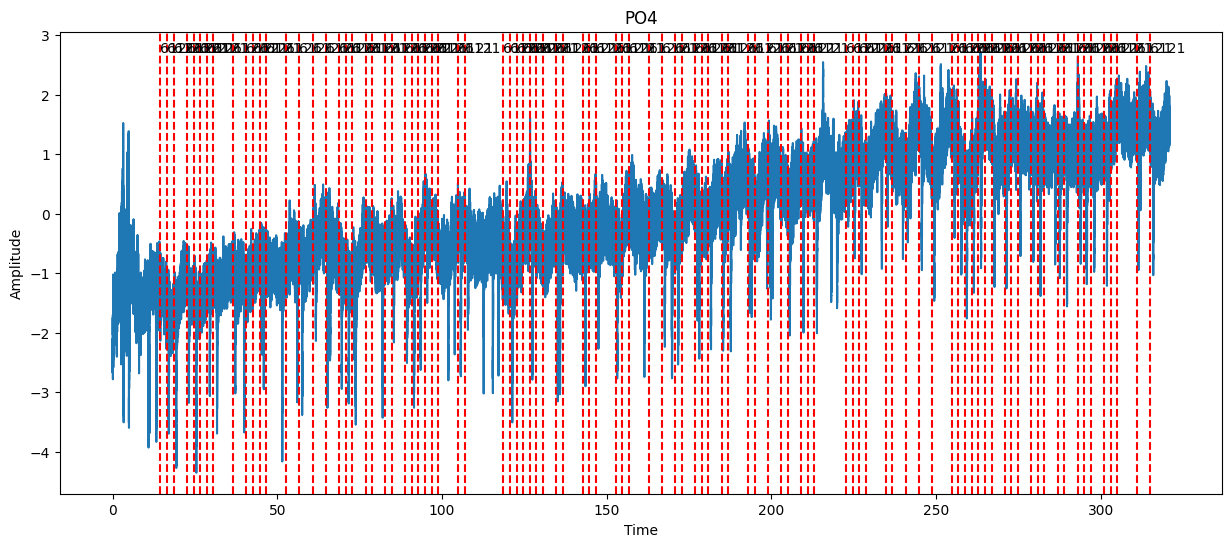

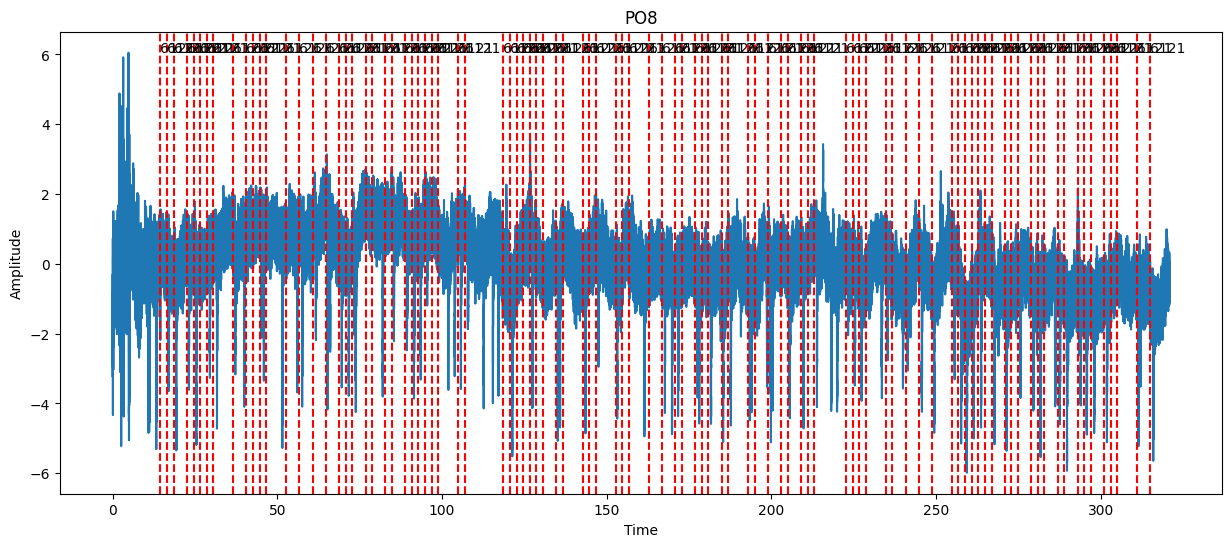

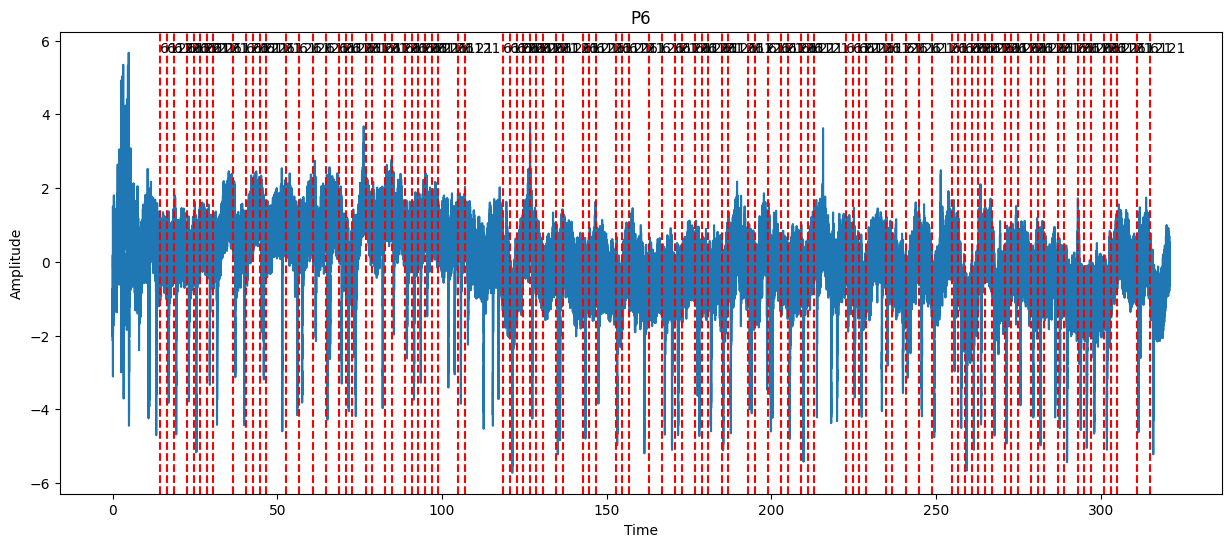

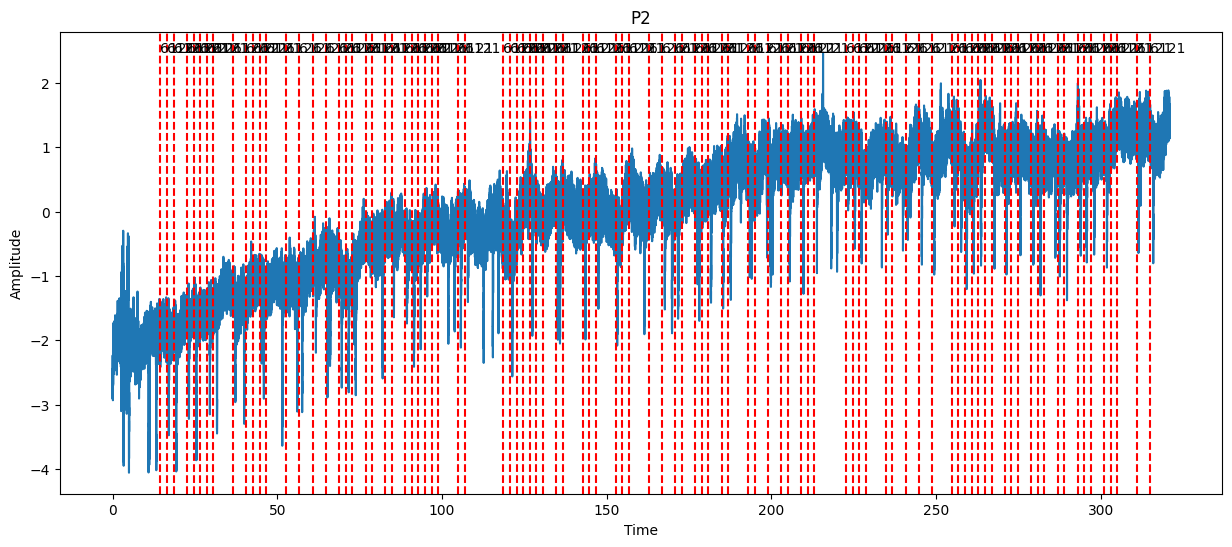

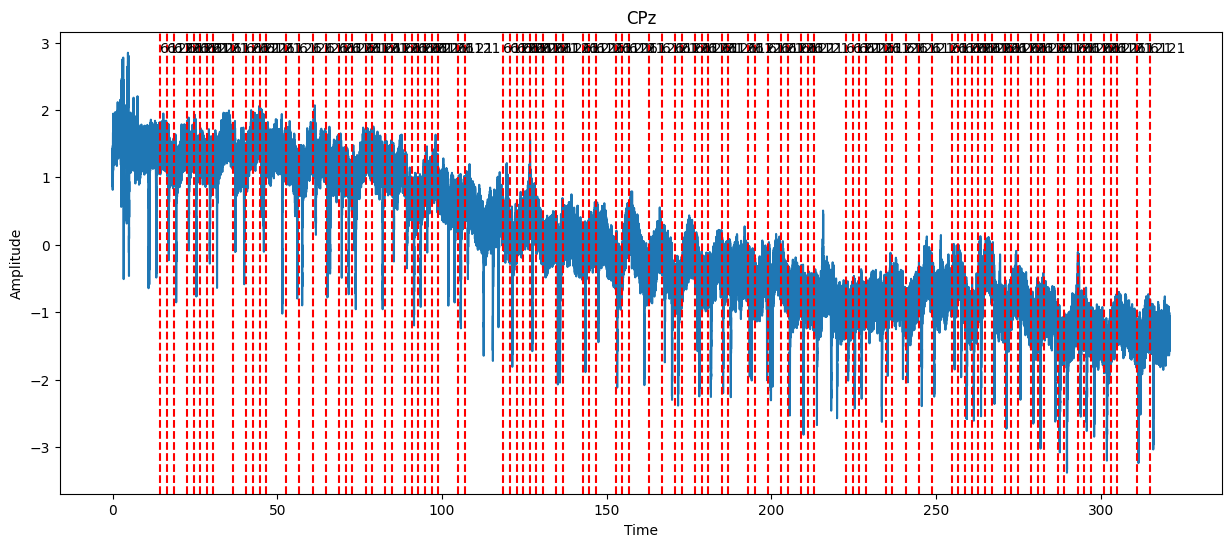

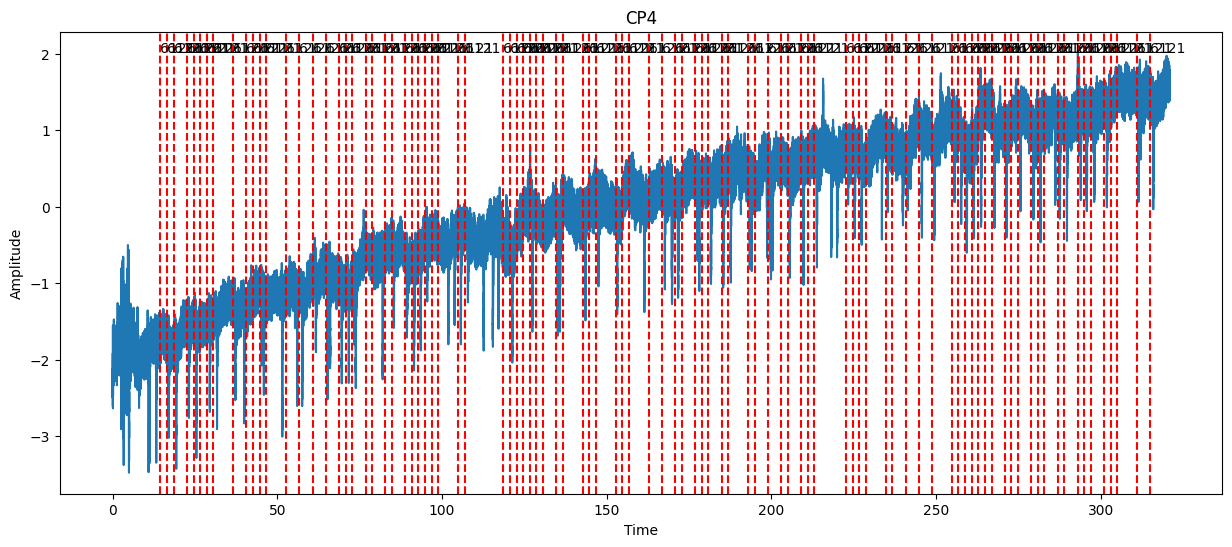

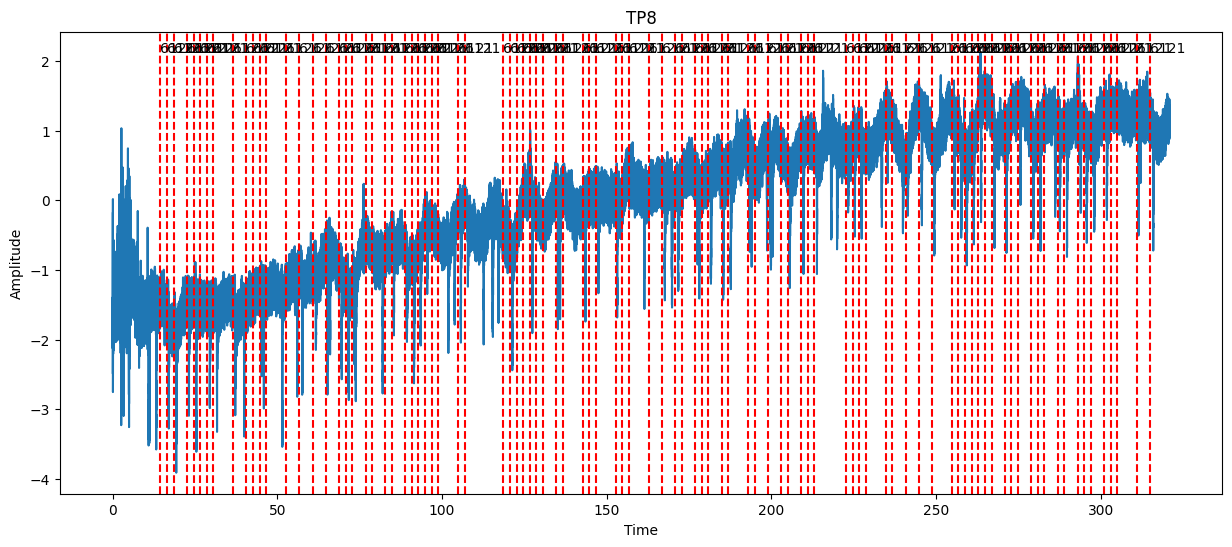

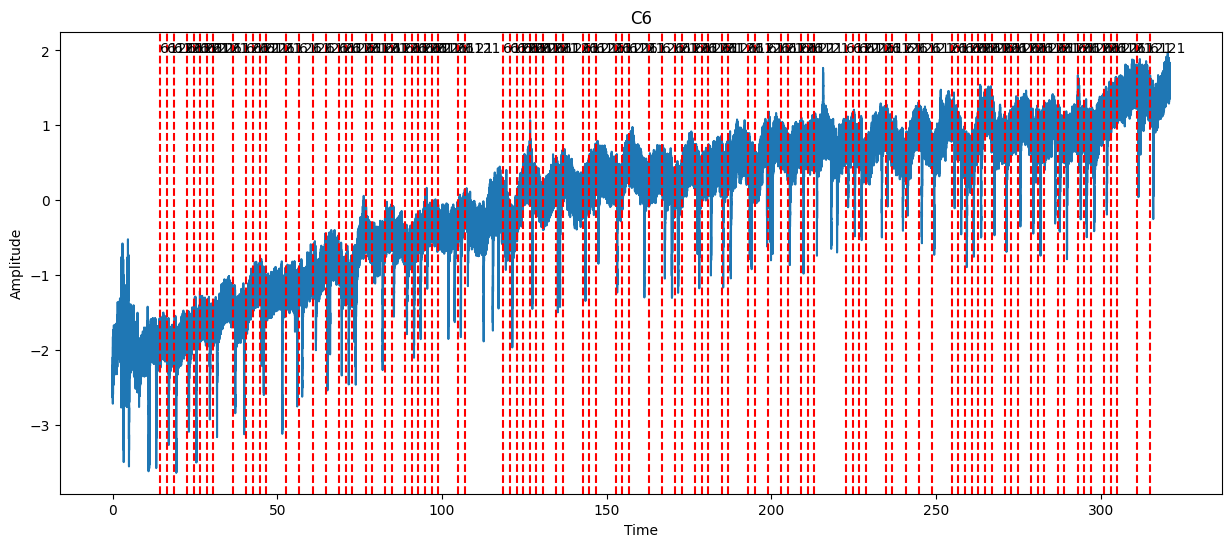

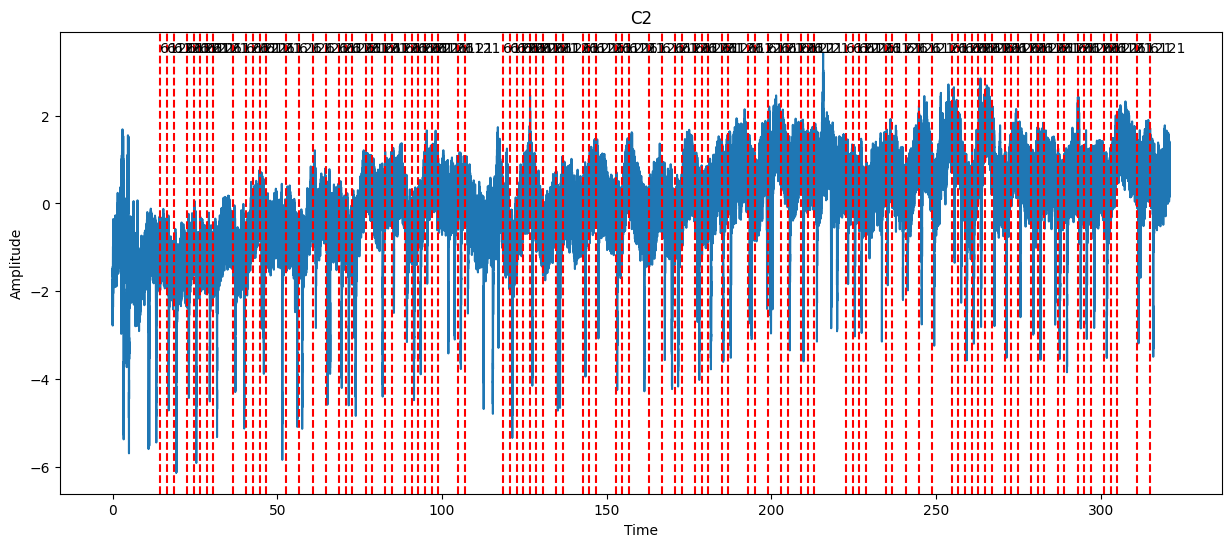

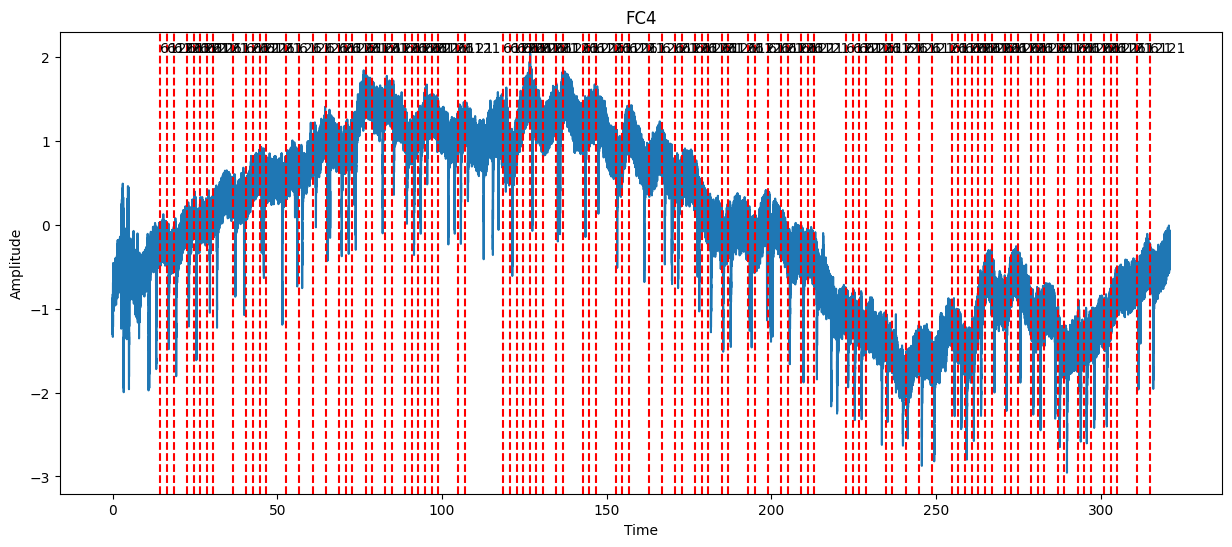

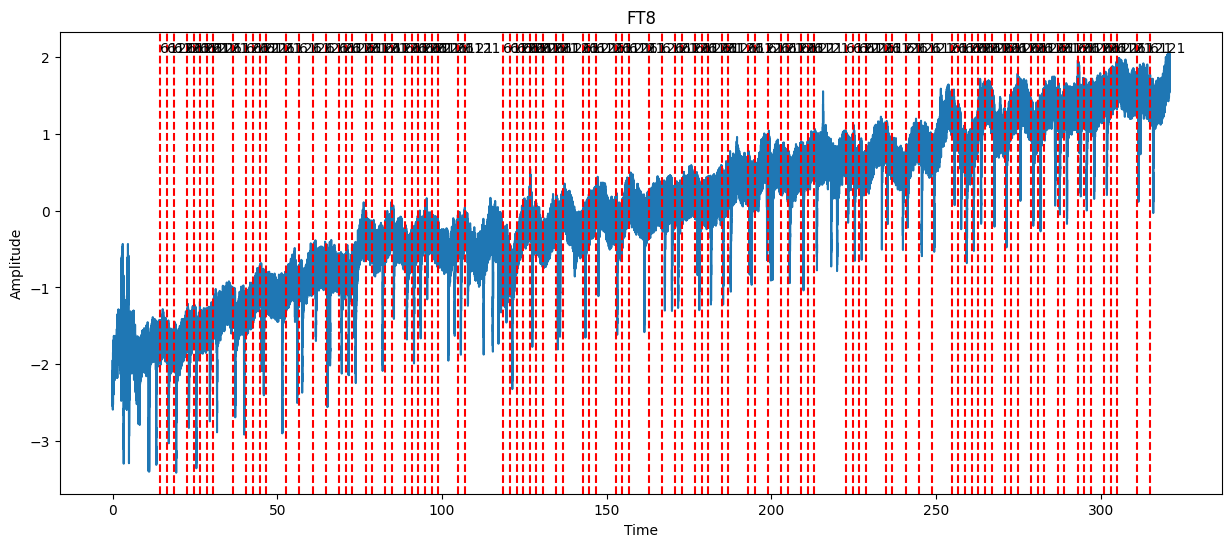

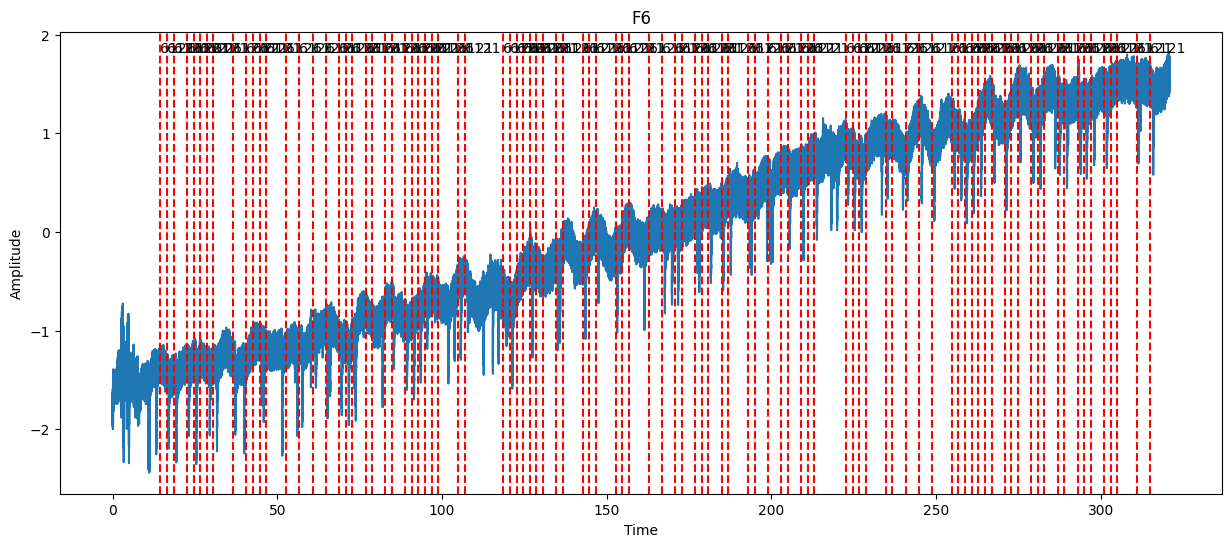

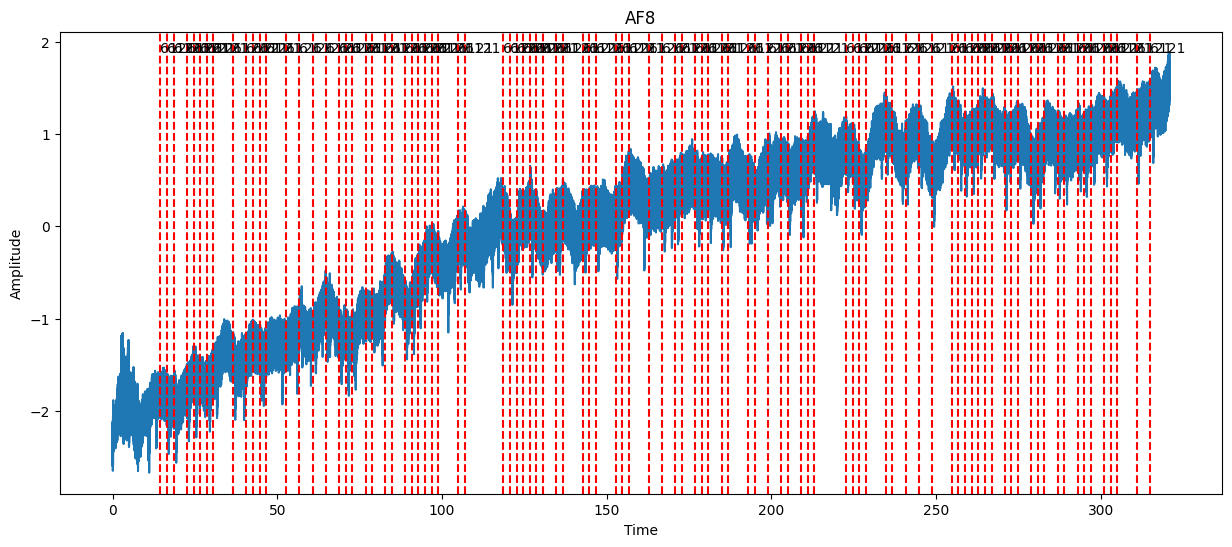

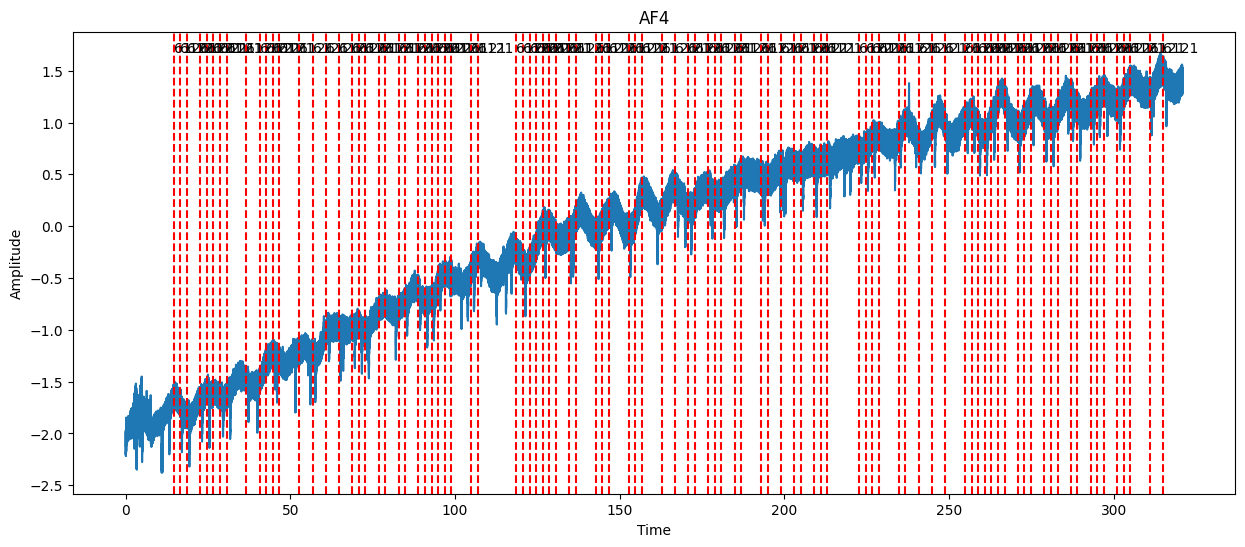

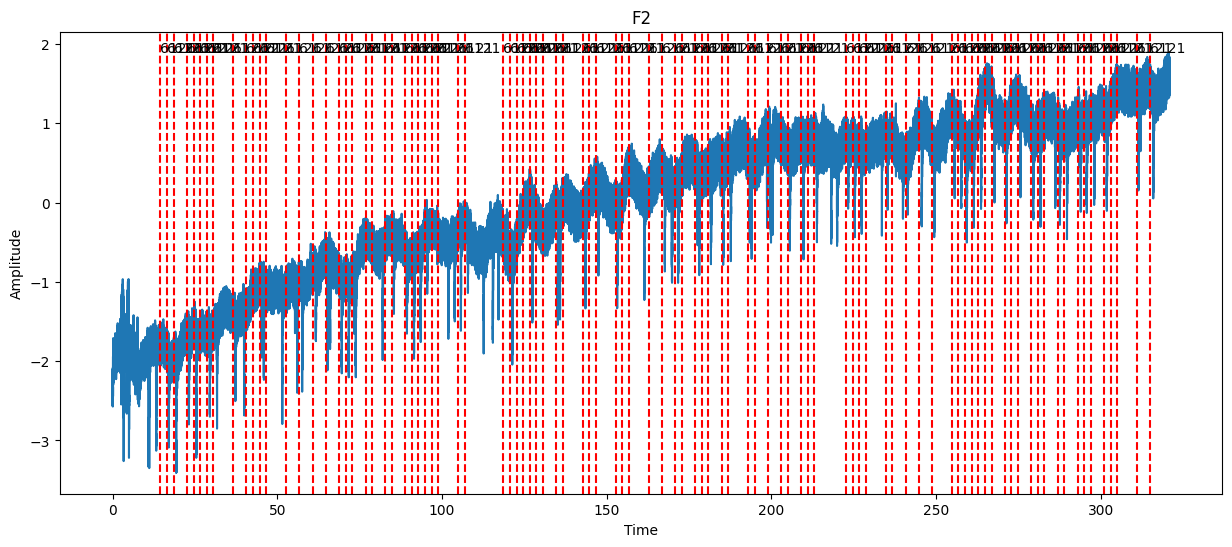

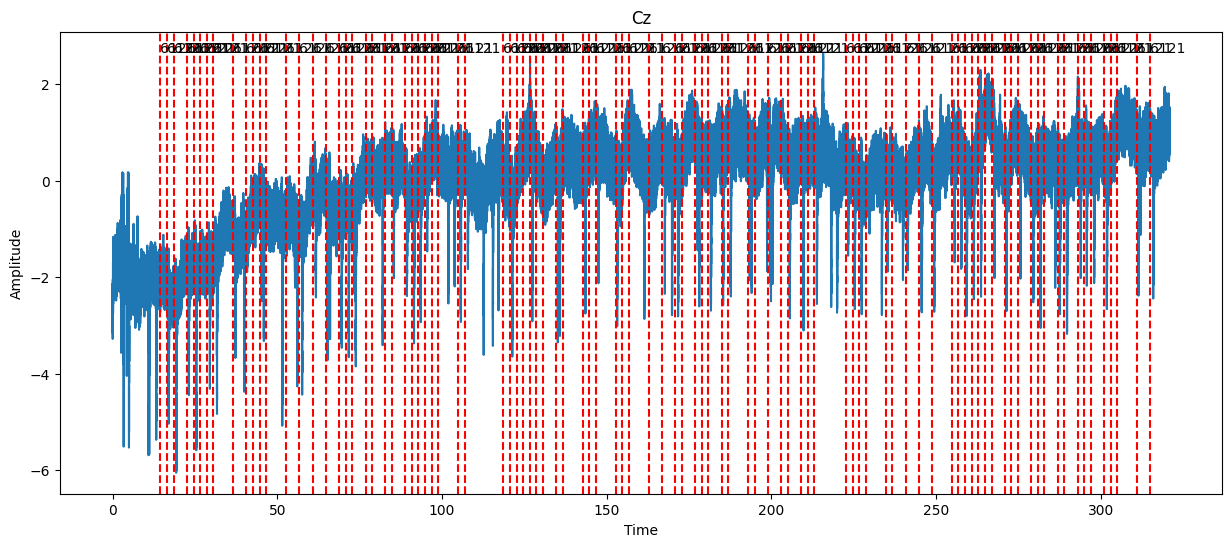

In [ ]:
for channel in range(len(channels)):
    plt.figure(figsize=(15,6))
    plt.plot(times, data_norm[channel])
    for index, evt in annotations.iterrows():
        if evt['description'] == '6121':
            plt.axvline(x=evt['onset'],color='r',linestyle='--')
            plt.text(evt['onset'], data_norm[channel].max(), evt['description'])
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(channels[channel])
    plt.show()

### Mutual Information channel selection

In [22]:
datalist = []

In [32]:
label_list = []
for i in range(len(rest_files_path)):
    label_list.append(0)
for i in range(len(zerob_files_path)):
    label_list.append(1)

display(label_list)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [31]:
display(datalist[29].shape)

(29973, 64)